# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent to tune the parameters of A PID controller

### 1. Import the Necessary Packages

In [7]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import matlab.engine
eng = matlab.engine.start_matlab()

### 2. Instantiate the Agent

In [9]:
from dqn_agent import Agent
agent = Agent(state_size=3, action_size=9, seed=0)


### 3. Train the Agent with DQN

In [16]:
evolution_tr = []
evolution_ov = []
evolution_er = []

def faire_action(numero,vecteur):
    kp=vecteur[0]
    ki=vecteur[1]
    kd=vecteur[2]
    if numero == 0:
        kp=kp+1
    if numero == 1:
        kp=kp-1
    if numero == 2:
        kp=kp
    if numero == 3:
        ki=ki+1
    if numero == 4:
        ki=ki-1
    if numero == 5:
        ki=ki
    if numero == 6:
        kd=kd+1
    if numero == 7:
        kd=kd-1
    if numero == 8:
        kd=kd
        
    if kp>20 :
        kp=20
    if kp<-20:
        kp=-20
    if ki>20 :
        ki=20
    if ki<-20:
        ki=-20
    if kd>20 :
        kd=20
    if kd<-20:
        kd=-20
        
    vecteur=np.array([kp,ki,kd])
    return vecteur

def recompense(vecteur,objectif):
    
    tr_desire=objectif[0].item()
    ov_desire=objectif[1].item()
    err_desire=objectif[2].item()
    
    kp=vecteur[0].item()
    ki=vecteur[1].item()
    kd=vecteur[2].item()
    
    resultat=eng.controleur(kp,kd,ki,nargout=3)
    
    tr=np.array(resultat[0])
    ov=np.array(resultat[1])
    err=np.array(resultat[2])
    
    evolution_tr.append(tr)
    evolution_ov.append(ov)
    evolution_er.append(err)
    
    if tr==tr_desire:
        reward1=100
    elif tr < tr_desire:
        reward1 = 1
    else:
        reward1=-1
        
    if ov==ov_desire:
        reward2=100
    elif ov < ov_desire:
        reward2 = 1
    else:
        reward2=-1 
        
    if err<0.0006:
        reward3=100
    else:
        reward3=-10
        
    reward=reward1+reward2+reward3
    
    if tr==tr_desire and ov==ov_desire and err==err_desire:
        done = True
    else:
        done = False
    
    return reward,done

In [17]:
# modification : 
# Training-1 : 64 neurones par couches || score moyen de 200 // reward 100  
# Training-2 : 30 neurones par couches au lieu de 64 ||score moyen de 200 // reward 100 
# Training-3 : 30 neurones par couches || score moyen de 2000 // reward 100 
# training-4 : 50 neurones par couches || score moyen de 500 || reward 100 



 kp: 1, ki: 2, kd: 3 

 kp: 1, ki: 2, kd: 2 

 kp: 2, ki: 2, kd: 2 

 kp: 2, ki: 1, kd: 2 

 kp: 2, ki: 1, kd: 3 

 kp: 2, ki: 1, kd: 3 

 kp: 2, ki: 2, kd: 3 

 kp: 2, ki: 3, kd: 3 

 kp: 3, ki: 3, kd: 3 

 kp: 3, ki: 4, kd: 3 

 kp: 3, ki: 4, kd: 3 

 kp: 4, ki: 4, kd: 3 

 kp: 4, ki: 4, kd: 3 

 kp: 5, ki: 4, kd: 3 

 kp: 4, ki: 4, kd: 3 

 kp: 5, ki: 4, kd: 3 

 kp: 6, ki: 4, kd: 3 

 kp: 6, ki: 4, kd: 2 

 kp: 6, ki: 4, kd: 2 

 kp: 5, ki: 4, kd: 2 

 kp: 5, ki: 4, kd: 3 

 kp: 5, ki: 4, kd: 3 

 kp: 4, ki: 4, kd: 3 

 kp: 3, ki: 4, kd: 3 

 kp: 3, ki: 4, kd: 3 

 kp: 3, ki: 4, kd: 4 

 kp: 3, ki: 4, kd: 4 

 kp: 3, ki: 4, kd: 4 

 kp: 4, ki: 4, kd: 4 

 kp: 4, ki: 4, kd: 4 

 kp: 4, ki: 4, kd: 5 

 kp: 4, ki: 4, kd: 4 

 kp: 4, ki: 4, kd: 4 

 kp: 4, ki: 3, kd: 4 

 kp: 5, ki: 3, kd: 4 

 kp: 6, ki: 3, kd: 4 

 kp: 6, ki: 3, kd: 4 

 kp: 6, ki: 3, kd: 5 

 kp: 6, ki: 3, kd: 6 

 kp: 5, ki: 3, kd: 6 

 kp: 5, ki: 2, kd: 6 

 kp: 5, ki: 1, kd: 6 

 kp: 5, ki: 1, kd: 7 

 kp: 6, ki


 kp: 9, ki: -10, kd: -2 

 kp: 9, ki: -10, kd: -2 

 kp: 9, ki: -11, kd: -2 

 kp: 10, ki: -11, kd: -2 

 kp: 9, ki: -11, kd: -2 

 kp: 10, ki: -11, kd: -2 

 kp: 10, ki: -11, kd: -1 

 kp: 10, ki: -11, kd: -1 

 kp: 10, ki: -11, kd: -1 

 kp: 10, ki: -11, kd: -1 

 kp: 10, ki: -11, kd: 0 

 kp: 10, ki: -11, kd: 0 

 kp: 11, ki: -11, kd: 0 

 kp: 11, ki: -12, kd: 0 

 kp: 11, ki: -11, kd: 0 

 kp: 11, ki: -11, kd: 0 

 kp: 12, ki: -11, kd: 0 

 kp: 12, ki: -11, kd: 0 

 kp: 12, ki: -10, kd: 0 

 kp: 12, ki: -10, kd: 0 

 kp: 11, ki: -10, kd: 0 

 kp: 11, ki: -10, kd: 0 

 kp: 11, ki: -10, kd: 0 

 kp: 11, ki: -10, kd: 1 

 kp: 11, ki: -10, kd: 0 

 kp: 11, ki: -10, kd: 1 

 kp: 12, ki: -10, kd: 1 

 kp: 11, ki: -10, kd: 1 

 kp: 10, ki: -10, kd: 1 

 kp: 10, ki: -10, kd: 2 

 kp: 10, ki: -10, kd: 1 

 kp: 10, ki: -10, kd: 0 

 kp: 10, ki: -10, kd: 0 

 kp: 10, ki: -10, kd: 0 

 kp: 10, ki: -10, kd: 0 

 kp: 10, ki: -10, kd: 0 

 kp: 10, ki: -9, kd: 0 

 kp: 11, ki: -9, kd: 0 

 kp: 11


 kp: 17, ki: -11, kd: 9 

 kp: 17, ki: -11, kd: 9 

 kp: 17, ki: -10, kd: 9 

 kp: 17, ki: -10, kd: 10 

 kp: 17, ki: -10, kd: 10 

 kp: 17, ki: -9, kd: 10 

 kp: 17, ki: -10, kd: 10 

 kp: 17, ki: -10, kd: 10 

 kp: 17, ki: -10, kd: 11 

 kp: 17, ki: -10, kd: 11 

 kp: 17, ki: -10, kd: 11 

 kp: 17, ki: -9, kd: 11 

 kp: 17, ki: -10, kd: 11 

 kp: 18, ki: -10, kd: 11 

 kp: 18, ki: -11, kd: 11 

 kp: 18, ki: -11, kd: 11 

 kp: 18, ki: -11, kd: 12 

 kp: 18, ki: -11, kd: 12 

 kp: 18, ki: -11, kd: 12 

 kp: 18, ki: -10, kd: 12 

 kp: 18, ki: -10, kd: 11 

 kp: 18, ki: -10, kd: 12 

 kp: 18, ki: -10, kd: 12 

 kp: 18, ki: -10, kd: 12 

 kp: 18, ki: -11, kd: 12 

 kp: 18, ki: -11, kd: 13 

 kp: 18, ki: -11, kd: 13 

 kp: 18, ki: -12, kd: 13 

 kp: 17, ki: -12, kd: 13 

 kp: 17, ki: -12, kd: 13 

 kp: 17, ki: -12, kd: 14 

 kp: 18, ki: -12, kd: 14 

 kp: 19, ki: -12, kd: 14 

 kp: 19, ki: -12, kd: 15 

 kp: 19, ki: -12, kd: 15 

 kp: 19, ki: -13, kd: 15 

 kp: 19, ki: -13, kd: 14 

 kp: 


 kp: 20, ki: -9, kd: 19 

 kp: 20, ki: -10, kd: 19 

 kp: 20, ki: -11, kd: 19 

 kp: 20, ki: -12, kd: 19 

 kp: 20, ki: -12, kd: 19 

 kp: 20, ki: -11, kd: 19 

 kp: 20, ki: -11, kd: 18 

 kp: 20, ki: -11, kd: 18 

 kp: 20, ki: -11, kd: 18 

 kp: 20, ki: -10, kd: 18 

 kp: 20, ki: -10, kd: 18 

 kp: 20, ki: -10, kd: 17 

 kp: 20, ki: -10, kd: 17 

 kp: 20, ki: -10, kd: 17 

 kp: 20, ki: -10, kd: 17 

 kp: 20, ki: -10, kd: 17 

 kp: 20, ki: -10, kd: 18 

 kp: 20, ki: -10, kd: 18 

 kp: 20, ki: -10, kd: 18 

 kp: 20, ki: -9, kd: 18 

 kp: 20, ki: -9, kd: 18 

 kp: 20, ki: -9, kd: 17 

 kp: 20, ki: -8, kd: 17 

 kp: 20, ki: -8, kd: 18 

 kp: 20, ki: -8, kd: 18 

 kp: 20, ki: -8, kd: 18 

 kp: 20, ki: -8, kd: 19 

 kp: 20, ki: -8, kd: 19 
Episode 1	Average Score: -12000.00
 kp: 0, ki: 2, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp: 0, ki: 1, kd: 3 

 kp: 0, ki: 1, kd: 4 

 kp: 0, ki: 1, kd: 4 

 kp: 1, ki: 1, kd: 4 

 kp: 1, ki: 1, kd: 4 

 kp: 1, ki: 1, kd: 5 

 kp: 1, ki: 1, kd: 4 

 kp: 1, ki: 


 kp: 5, ki: 18, kd: -2 

 kp: 5, ki: 18, kd: -2 

 kp: 4, ki: 18, kd: -2 

 kp: 4, ki: 18, kd: -1 

 kp: 3, ki: 18, kd: -1 

 kp: 4, ki: 18, kd: -1 

 kp: 4, ki: 18, kd: 0 

 kp: 5, ki: 18, kd: 0 

 kp: 5, ki: 18, kd: 0 

 kp: 5, ki: 19, kd: 0 

 kp: 4, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: 0 

 kp: 3, ki: 19, kd: -1 

 kp: 4, ki: 19, kd: -1 

 kp: 4, ki: 19, kd: -1 

 kp: 4, ki: 19, kd: -1 

 kp: 4, ki: 20, kd: -1 

 kp: 4, ki: 20, kd: -1 

 kp: 3, ki: 20, kd: -1 

 kp: 3, ki: 20, kd: -2 

 kp: 3, ki: 20, kd: -2 

 kp: 3, ki: 20, kd: -2 

 kp: 3, ki: 19, kd: -2 

 kp: 3, ki: 19, kd: -2 

 kp: 3, ki: 19, kd: -3 

 kp: 2, ki: 19, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 3, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki: 20, kd: -3 

 kp: 2, ki


 kp: -3, ki: 8, kd: -3 

 kp: -4, ki: 8, kd: -3 

 kp: -4, ki: 8, kd: -2 

 kp: -3, ki: 8, kd: -2 

 kp: -3, ki: 8, kd: -1 

 kp: -2, ki: 8, kd: -1 

 kp: -2, ki: 8, kd: -1 

 kp: -2, ki: 7, kd: -1 

 kp: -2, ki: 8, kd: -1 

 kp: -1, ki: 8, kd: -1 

 kp: -1, ki: 8, kd: 0 

 kp: 0, ki: 8, kd: 0 

 kp: 0, ki: 7, kd: 0 

 kp: -1, ki: 7, kd: 0 

 kp: -1, ki: 7, kd: -1 

 kp: -1, ki: 7, kd: 0 

 kp: -1, ki: 7, kd: 1 

 kp: -1, ki: 7, kd: 2 

 kp: -2, ki: 7, kd: 2 

 kp: -2, ki: 7, kd: 2 

 kp: -2, ki: 6, kd: 2 

 kp: -2, ki: 6, kd: 1 

 kp: -2, ki: 6, kd: 1 

 kp: -3, ki: 6, kd: 1 

 kp: -3, ki: 6, kd: 0 

 kp: -3, ki: 6, kd: 0 

 kp: -3, ki: 5, kd: 0 

 kp: -3, ki: 5, kd: 0 

 kp: -3, ki: 6, kd: 0 

 kp: -3, ki: 6, kd: 0 

 kp: -2, ki: 6, kd: 0 

 kp: -2, ki: 5, kd: 0 

 kp: -2, ki: 5, kd: 0 

 kp: -2, ki: 4, kd: 0 

 kp: -2, ki: 4, kd: 0 

 kp: -1, ki: 4, kd: 0 

 kp: -1, ki: 4, kd: 0 

 kp: -1, ki: 4, kd: 0 

 kp: -1, ki: 4, kd: 0 

 kp: -1, ki: 5, kd: 0 

 kp: -1, ki: 5, kd: -1 

 kp: 


 kp: -13, ki: 5, kd: -8 

 kp: -13, ki: 5, kd: -8 

 kp: -13, ki: 6, kd: -8 

 kp: -13, ki: 6, kd: -9 

 kp: -13, ki: 5, kd: -9 

 kp: -13, ki: 5, kd: -8 

 kp: -13, ki: 5, kd: -7 

 kp: -13, ki: 5, kd: -7 

 kp: -12, ki: 5, kd: -7 

 kp: -12, ki: 5, kd: -7 

 kp: -12, ki: 6, kd: -7 

 kp: -13, ki: 6, kd: -7 

 kp: -13, ki: 7, kd: -7 

 kp: -13, ki: 7, kd: -8 

 kp: -13, ki: 7, kd: -8 

 kp: -13, ki: 7, kd: -8 

 kp: -13, ki: 8, kd: -8 

 kp: -13, ki: 9, kd: -8 

 kp: -13, ki: 9, kd: -7 

 kp: -13, ki: 9, kd: -7 

 kp: -14, ki: 9, kd: -7 

 kp: -14, ki: 8, kd: -7 

 kp: -14, ki: 8, kd: -7 

 kp: -14, ki: 8, kd: -6 

 kp: -14, ki: 8, kd: -6 

 kp: -14, ki: 8, kd: -6 

 kp: -14, ki: 8, kd: -6 
Episode 2	Average Score: -11945.00
 kp: 1, ki: 1, kd: 3 

 kp: 1, ki: 2, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp: 0, ki: 2, kd: 4 

 kp: 0, ki: 3, kd: 4 

 kp: 1, ki: 3, kd: 4 

 kp: 1, ki: 4, kd: 4 

 kp: 1, ki: 4, kd: 5 

 kp: 0, ki: 4, kd: 5 

 kp: 0, ki


 kp: 0, ki: -4, kd: 4 

 kp: 0, ki: -3, kd: 4 

 kp: 1, ki: -3, kd: 4 

 kp: 1, ki: -3, kd: 4 

 kp: 1, ki: -4, kd: 4 

 kp: 2, ki: -4, kd: 4 

 kp: 2, ki: -4, kd: 4 

 kp: 2, ki: -4, kd: 3 

 kp: 2, ki: -3, kd: 3 

 kp: 2, ki: -3, kd: 2 

 kp: 2, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 0, ki: -3, kd: 2 

 kp: 0, ki: -2, kd: 2 

 kp: 0, ki: -2, kd: 2 

 kp: 0, ki: -2, kd: 2 

 kp: -1, ki: -2, kd: 2 

 kp: 0, ki: -2, kd: 2 

 kp: 1, ki: -2, kd: 2 

 kp: 2, ki: -2, kd: 2 

 kp: 2, ki: -1, kd: 2 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: 0, kd: 3 

 kp: 2, ki: 0, kd: 3 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: -2, kd: 3 

 kp: 2, ki: -2, kd: 2 

 kp: 2, ki: -2, kd: 3 

 kp: 2, ki: -1, kd: 3 

 kp: 2, ki: -1, kd: 4 

 kp: 2, ki: -2, kd: 4 

 kp: 2, ki: -2, kd: 3 

 kp: 2, ki: -3, kd: 3 

 kp: 2, ki: -3, kd: 3 

 kp: 2, ki: -2, kd: 3 

 kp: 1, ki: -2, 


 kp: 10, ki: -15, kd: 11 

 kp: 10, ki: -15, kd: 11 

 kp: 10, ki: -15, kd: 11 

 kp: 10, ki: -15, kd: 11 

 kp: 10, ki: -15, kd: 10 

 kp: 10, ki: -15, kd: 9 

 kp: 10, ki: -15, kd: 10 

 kp: 10, ki: -15, kd: 11 

 kp: 10, ki: -14, kd: 11 

 kp: 10, ki: -14, kd: 12 

 kp: 11, ki: -14, kd: 12 

 kp: 11, ki: -13, kd: 12 

 kp: 11, ki: -12, kd: 12 

 kp: 12, ki: -12, kd: 12 

 kp: 12, ki: -12, kd: 12 

 kp: 11, ki: -12, kd: 12 

 kp: 11, ki: -11, kd: 12 

 kp: 11, ki: -12, kd: 12 

 kp: 11, ki: -12, kd: 13 

 kp: 11, ki: -12, kd: 13 

 kp: 12, ki: -12, kd: 13 

 kp: 12, ki: -12, kd: 14 

 kp: 12, ki: -12, kd: 14 

 kp: 12, ki: -12, kd: 15 

 kp: 12, ki: -12, kd: 14 

 kp: 12, ki: -12, kd: 15 

 kp: 11, ki: -12, kd: 15 

 kp: 11, ki: -12, kd: 15 

 kp: 10, ki: -12, kd: 15 

 kp: 11, ki: -12, kd: 15 

 kp: 11, ki: -13, kd: 15 

 kp: 11, ki: -13, kd: 15 

 kp: 11, ki: -13, kd: 15 

 kp: 11, ki: -13, kd: 15 

 kp: 11, ki: -13, kd: 14 

 kp: 11, ki: -13, kd: 14 

 kp: 10, ki: -13, kd: 14 

 


 kp: -1, ki: -13, kd: 7 

 kp: -1, ki: -13, kd: 8 

 kp: -1, ki: -13, kd: 8 

 kp: 0, ki: -13, kd: 8 

 kp: -1, ki: -13, kd: 8 

 kp: 0, ki: -13, kd: 8 

 kp: 0, ki: -13, kd: 9 

 kp: 0, ki: -14, kd: 9 

 kp: 0, ki: -14, kd: 10 

 kp: 1, ki: -14, kd: 10 

 kp: 1, ki: -14, kd: 11 

 kp: 1, ki: -14, kd: 11 

 kp: 2, ki: -14, kd: 11 

 kp: 2, ki: -14, kd: 11 

 kp: 1, ki: -14, kd: 11 

 kp: 0, ki: -14, kd: 11 

 kp: 0, ki: -14, kd: 10 

 kp: 0, ki: -14, kd: 10 

 kp: 0, ki: -14, kd: 10 

 kp: 1, ki: -14, kd: 10 

 kp: 1, ki: -14, kd: 10 

 kp: 1, ki: -14, kd: 10 

 kp: 1, ki: -13, kd: 10 

 kp: 0, ki: -13, kd: 10 

 kp: 0, ki: -14, kd: 10 

 kp: 0, ki: -14, kd: 11 

 kp: 0, ki: -14, kd: 12 

 kp: 0, ki: -13, kd: 12 

 kp: 0, ki: -13, kd: 11 
Episode 3	Average Score: -11963.33
 kp: 1, ki: 1, kd: 3 

 kp: 0, ki: 1, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp: -1, ki: 2, kd: 3 

 kp: -1, ki: 2, kd: 3 

 kp: -1, ki: 2, kd: 3 

 kp: -1, ki: 2, kd: 3 

 kp: -1, ki: 2, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp


 kp: -9, ki: 3, kd: 6 

 kp: -9, ki: 3, kd: 7 

 kp: -9, ki: 3, kd: 7 

 kp: -8, ki: 3, kd: 7 

 kp: -8, ki: 3, kd: 7 

 kp: -8, ki: 4, kd: 7 

 kp: -8, ki: 4, kd: 7 

 kp: -8, ki: 5, kd: 7 

 kp: -7, ki: 5, kd: 7 

 kp: -7, ki: 4, kd: 7 

 kp: -6, ki: 4, kd: 7 

 kp: -5, ki: 4, kd: 7 

 kp: -5, ki: 4, kd: 7 

 kp: -5, ki: 4, kd: 7 

 kp: -5, ki: 5, kd: 7 

 kp: -5, ki: 5, kd: 7 

 kp: -5, ki: 4, kd: 7 

 kp: -5, ki: 4, kd: 7 

 kp: -5, ki: 4, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -6, ki: 3, kd: 7 

 kp: -6, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -5, ki: 3, kd: 7 

 kp: -6, ki: 3, kd: 7 

 kp: -7, ki: 3, kd: 7 

 kp: -8, ki: 3, kd: 7 

 kp: -8, ki: 3, kd: 7 

 kp: -8, ki: 3, kd: 6 

 kp: -8, ki: 3, kd: 7 

 kp: -9, ki: 3, kd: 7 

 kp: -9, ki: 3, kd: 7 

 kp: -9, ki: 3, kd: 6 

 kp: -8, ki: 3, kd: 6 

 kp: -8, ki: 3, kd: 6 

 kp: -8, ki: 3, kd: 5 

 kp: -8, ki: 4,


 kp: -6, ki: -15, kd: 7 

 kp: -6, ki: -14, kd: 7 

 kp: -6, ki: -14, kd: 7 

 kp: -6, ki: -14, kd: 6 

 kp: -6, ki: -14, kd: 6 

 kp: -7, ki: -14, kd: 6 

 kp: -6, ki: -14, kd: 6 

 kp: -6, ki: -14, kd: 6 

 kp: -6, ki: -14, kd: 6 

 kp: -6, ki: -14, kd: 6 

 kp: -5, ki: -14, kd: 6 

 kp: -6, ki: -14, kd: 6 

 kp: -7, ki: -14, kd: 6 

 kp: -7, ki: -14, kd: 6 

 kp: -7, ki: -14, kd: 6 

 kp: -7, ki: -15, kd: 6 

 kp: -7, ki: -15, kd: 7 

 kp: -6, ki: -15, kd: 7 

 kp: -6, ki: -16, kd: 7 

 kp: -6, ki: -16, kd: 6 

 kp: -6, ki: -16, kd: 7 

 kp: -6, ki: -16, kd: 6 

 kp: -6, ki: -16, kd: 7 

 kp: -6, ki: -16, kd: 6 

 kp: -6, ki: -16, kd: 7 

 kp: -6, ki: -16, kd: 7 

 kp: -6, ki: -16, kd: 7 

 kp: -6, ki: -16, kd: 6 

 kp: -6, ki: -16, kd: 6 

 kp: -6, ki: -16, kd: 5 

 kp: -6, ki: -16, kd: 4 

 kp: -6, ki: -16, kd: 4 

 kp: -6, ki: -16, kd: 5 

 kp: -6, ki: -16, kd: 5 

 kp: -6, ki: -16, kd: 6 

 kp: -6, ki: -16, kd: 6 

 kp: -5, ki: -16, kd: 6 

 kp: -5, ki: -16, kd: 6 

 kp: -5, ki


 kp: 2, ki: -3, kd: 11 

 kp: 3, ki: -3, kd: 11 

 kp: 4, ki: -3, kd: 11 

 kp: 4, ki: -3, kd: 11 

 kp: 4, ki: -2, kd: 11 

 kp: 4, ki: -1, kd: 11 

 kp: 4, ki: -1, kd: 12 

 kp: 4, ki: -1, kd: 11 

 kp: 4, ki: 0, kd: 11 

 kp: 4, ki: 0, kd: 12 

 kp: 4, ki: 0, kd: 13 

 kp: 3, ki: 0, kd: 13 

 kp: 3, ki: 0, kd: 14 

 kp: 3, ki: 1, kd: 14 

 kp: 3, ki: 1, kd: 14 

 kp: 4, ki: 1, kd: 14 

 kp: 4, ki: 1, kd: 14 

 kp: 4, ki: 1, kd: 15 

 kp: 3, ki: 1, kd: 15 

 kp: 3, ki: 1, kd: 15 

 kp: 4, ki: 1, kd: 15 

 kp: 4, ki: 1, kd: 14 

 kp: 4, ki: 1, kd: 15 

 kp: 4, ki: 2, kd: 15 

 kp: 3, ki: 2, kd: 15 

 kp: 3, ki: 2, kd: 16 

 kp: 3, ki: 1, kd: 16 

 kp: 3, ki: 1, kd: 17 

 kp: 3, ki: 1, kd: 16 

 kp: 3, ki: 1, kd: 15 

 kp: 3, ki: 0, kd: 15 

 kp: 3, ki: 0, kd: 16 

 kp: 3, ki: 0, kd: 16 

 kp: 4, ki: 0, kd: 16 

 kp: 4, ki: 0, kd: 16 

 kp: 4, ki: 0, kd: 16 

 kp: 4, ki: 0, kd: 15 

 kp: 3, ki: 0, kd: 15 

 kp: 3, ki: 0, kd: 14 

 kp: 3, ki: 0, kd: 14 

 kp: 3, ki: 0, kd: 14 

 kp: 3,


 kp: 5, ki: 5, kd: -3 

 kp: 6, ki: 5, kd: -3 

 kp: 6, ki: 5, kd: -4 

 kp: 6, ki: 5, kd: -5 

 kp: 6, ki: 5, kd: -6 

 kp: 6, ki: 5, kd: -7 

 kp: 6, ki: 5, kd: -7 

 kp: 7, ki: 5, kd: -7 

 kp: 6, ki: 5, kd: -7 

 kp: 6, ki: 4, kd: -7 

 kp: 6, ki: 4, kd: -6 

 kp: 5, ki: 4, kd: -6 

 kp: 5, ki: 5, kd: -6 

 kp: 5, ki: 5, kd: -6 

 kp: 5, ki: 5, kd: -5 

 kp: 5, ki: 5, kd: -5 

 kp: 5, ki: 6, kd: -5 

 kp: 5, ki: 7, kd: -5 

 kp: 5, ki: 7, kd: -5 

 kp: 5, ki: 7, kd: -5 

 kp: 5, ki: 7, kd: -5 

 kp: 5, ki: 8, kd: -5 

 kp: 6, ki: 8, kd: -5 

 kp: 6, ki: 8, kd: -5 

 kp: 6, ki: 8, kd: -6 

 kp: 6, ki: 8, kd: -6 

 kp: 7, ki: 8, kd: -6 

 kp: 7, ki: 9, kd: -6 

 kp: 7, ki: 9, kd: -7 

 kp: 7, ki: 10, kd: -7 

 kp: 7, ki: 10, kd: -6 

 kp: 7, ki: 10, kd: -6 

 kp: 7, ki: 10, kd: -5 

 kp: 8, ki: 10, kd: -5 

 kp: 8, ki: 10, kd: -5 

 kp: 9, ki: 10, kd: -5 

 kp: 9, ki: 10, kd: -5 

 kp: 8, ki: 10, kd: -5 

 kp: 7, ki: 10, kd: -5 

 kp: 7, ki: 10, kd: -5 

 kp: 8, ki: 10, kd: -5 

 kp


 kp: -5, ki: 18, kd: -6 

 kp: -5, ki: 19, kd: -6 

 kp: -5, ki: 19, kd: -5 

 kp: -4, ki: 19, kd: -5 

 kp: -3, ki: 19, kd: -5 

 kp: -3, ki: 19, kd: -5 

 kp: -3, ki: 19, kd: -5 

 kp: -3, ki: 19, kd: -5 

 kp: -3, ki: 19, kd: -5 

 kp: -3, ki: 19, kd: -6 

 kp: -3, ki: 19, kd: -6 

 kp: -3, ki: 19, kd: -7 

 kp: -3, ki: 19, kd: -7 

 kp: -3, ki: 19, kd: -8 

 kp: -3, ki: 19, kd: -8 

 kp: -3, ki: 19, kd: -9 

 kp: -3, ki: 19, kd: -9 

 kp: -3, ki: 19, kd: -8 

 kp: -3, ki: 20, kd: -8 

 kp: -3, ki: 20, kd: -8 

 kp: -3, ki: 20, kd: -7 

 kp: -2, ki: 20, kd: -7 

 kp: -2, ki: 20, kd: -7 

 kp: -2, ki: 20, kd: -7 

 kp: -2, ki: 20, kd: -7 

 kp: -3, ki: 20, kd: -7 

 kp: -3, ki: 20, kd: -6 

 kp: -3, ki: 20, kd: -6 

 kp: -3, ki: 20, kd: -6 

 kp: -4, ki: 20, kd: -6 

 kp: -3, ki: 20, kd: -6 

 kp: -4, ki: 20, kd: -6 

 kp: -3, ki: 20, kd: -6 

 kp: -3, ki: 20, kd: -6 

 kp: -4, ki: 20, kd: -6 

 kp: -4, ki: 20, kd: -6 

 kp: -4, ki: 20, kd: -6 

 kp: -4, ki: 20, kd: -5 

 kp: -4, ki


 kp: -2, ki: 20, kd: -1 

 kp: -2, ki: 19, kd: -1 

 kp: -2, ki: 19, kd: -1 

 kp: -2, ki: 19, kd: -2 

 kp: -2, ki: 19, kd: -2 

 kp: -2, ki: 19, kd: -2 

 kp: -2, ki: 19, kd: -2 

 kp: -2, ki: 20, kd: -2 

 kp: -2, ki: 20, kd: -1 

 kp: -2, ki: 19, kd: -1 

 kp: -2, ki: 19, kd: -1 

 kp: -2, ki: 18, kd: -1 

 kp: -3, ki: 18, kd: -1 

 kp: -3, ki: 19, kd: -1 

 kp: -3, ki: 20, kd: -1 

 kp: -4, ki: 20, kd: -1 

 kp: -4, ki: 20, kd: -1 

 kp: -4, ki: 20, kd: -1 

 kp: -4, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -2 

 kp: -6, ki: 20, kd: -2 

 kp: -6, ki: 20, kd: -3 

 kp: -6, ki: 20, kd: -3 

 kp: -6, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -3 

 kp: -5, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -4, ki: 20, kd: -2 

 kp: -5, ki: 20, kd: -2 

 kp: -5, ki


 kp: 6, ki: -14, kd: 0 

 kp: 6, ki: -13, kd: 0 

 kp: 6, ki: -13, kd: 0 

 kp: 6, ki: -12, kd: 0 

 kp: 6, ki: -12, kd: 0 

 kp: 6, ki: -12, kd: -1 

 kp: 6, ki: -13, kd: -1 

 kp: 6, ki: -13, kd: 0 

 kp: 5, ki: -13, kd: 0 

 kp: 6, ki: -13, kd: 0 

 kp: 6, ki: -12, kd: 0 

 kp: 6, ki: -12, kd: 0 

 kp: 6, ki: -12, kd: 1 

 kp: 5, ki: -12, kd: 1 

 kp: 5, ki: -12, kd: 2 

 kp: 5, ki: -12, kd: 2 

 kp: 5, ki: -12, kd: 3 

 kp: 4, ki: -12, kd: 3 

 kp: 4, ki: -12, kd: 3 

 kp: 4, ki: -13, kd: 3 

 kp: 4, ki: -13, kd: 3 

 kp: 4, ki: -13, kd: 3 

 kp: 4, ki: -13, kd: 2 

 kp: 4, ki: -12, kd: 2 

 kp: 4, ki: -11, kd: 2 

 kp: 4, ki: -11, kd: 2 

 kp: 4, ki: -11, kd: 2 

 kp: 4, ki: -12, kd: 2 

 kp: 4, ki: -13, kd: 2 

 kp: 4, ki: -12, kd: 2 

 kp: 4, ki: -12, kd: 2 

 kp: 4, ki: -12, kd: 3 

 kp: 4, ki: -12, kd: 4 

 kp: 4, ki: -12, kd: 4 

 kp: 4, ki: -12, kd: 4 

 kp: 4, ki: -12, kd: 3 

 kp: 4, ki: -12, kd: 4 

 kp: 4, ki: -12, kd: 3 

 kp: 4, ki: -13, kd: 3 

 kp: 4, ki: -12, kd: 3


 kp: 8, ki: 3, kd: 2 

 kp: 8, ki: 3, kd: 2 

 kp: 9, ki: 3, kd: 2 

 kp: 9, ki: 4, kd: 2 

 kp: 9, ki: 4, kd: 2 

 kp: 9, ki: 4, kd: 2 

 kp: 9, ki: 5, kd: 2 

 kp: 9, ki: 6, kd: 2 

 kp: 9, ki: 6, kd: 2 

 kp: 9, ki: 6, kd: 2 

 kp: 9, ki: 6, kd: 3 

 kp: 9, ki: 5, kd: 3 

 kp: 9, ki: 5, kd: 3 

 kp: 9, ki: 5, kd: 2 

 kp: 10, ki: 5, kd: 2 

 kp: 10, ki: 6, kd: 2 

 kp: 10, ki: 6, kd: 2 

 kp: 10, ki: 6, kd: 2 

 kp: 10, ki: 7, kd: 2 

 kp: 10, ki: 7, kd: 3 

 kp: 10, ki: 7, kd: 4 

 kp: 10, ki: 7, kd: 4 

 kp: 10, ki: 8, kd: 4 

 kp: 9, ki: 8, kd: 4 

 kp: 9, ki: 9, kd: 4 

 kp: 8, ki: 9, kd: 4 

 kp: 7, ki: 9, kd: 4 

 kp: 7, ki: 9, kd: 5 

 kp: 8, ki: 9, kd: 5 

 kp: 8, ki: 9, kd: 4 

 kp: 8, ki: 10, kd: 4 

 kp: 8, ki: 10, kd: 5 

 kp: 8, ki: 10, kd: 4 

 kp: 8, ki: 10, kd: 4 

 kp: 8, ki: 9, kd: 4 

 kp: 8, ki: 9, kd: 4 

 kp: 7, ki: 9, kd: 4 

 kp: 7, ki: 9, kd: 4 

 kp: 8, ki: 9, kd: 4 

 kp: 8, ki: 9, kd: 4 

 kp: 8, ki: 9, kd: 5 

 kp: 8, ki: 10, kd: 5 

 kp: 8, ki: 10, kd:


 kp: 6, ki: 3, kd: -12 

 kp: 6, ki: 4, kd: -12 

 kp: 6, ki: 4, kd: -11 

 kp: 6, ki: 3, kd: -11 

 kp: 6, ki: 3, kd: -12 

 kp: 6, ki: 3, kd: -12 

 kp: 6, ki: 3, kd: -12 

 kp: 6, ki: 3, kd: -11 

 kp: 5, ki: 3, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 6, ki: 2, kd: -11 

 kp: 6, ki: 2, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 5, ki: 2, kd: -11 

 kp: 5, ki: 3, kd: -11 

 kp: 5, ki: 3, kd: -11 

 kp: 5, ki: 3, kd: -11 

 kp: 5, ki: 4, kd: -11 

 kp: 5, ki: 4, kd: -12 

 kp: 6, ki: 4, kd: -12 

 kp: 6, ki: 4, kd: -12 

 kp: 6, ki: 4, kd: -12 

 kp: 6, ki: 3, kd: -12 

 kp: 6, ki: 4, kd: -12 

 kp: 6, ki: 4, kd: -11 

 kp: 6, ki: 4, kd: -11 

 kp: 6, ki: 4, kd: -11 

 kp: 6, ki: 4, kd: -11 

 kp: 6, ki: 3, kd: -11 

 kp: 6, ki: 2, kd: -11 

 kp: 6, ki: 2, kd: -11 

 kp: 6, ki: 2, kd: -11 

 kp: 6, ki: 2, kd: -10 

 kp: 6, ki: 2, kd: -9 

 kp: 6, ki: 2, kd: -9 

 kp: 6, ki: 2, kd: -9 

 k


 kp: -11, ki: 18, kd: -13 

 kp: -11, ki: 19, kd: -13 

 kp: -12, ki: 19, kd: -13 

 kp: -11, ki: 19, kd: -13 

 kp: -11, ki: 19, kd: -13 

 kp: -11, ki: 19, kd: -12 

 kp: -11, ki: 19, kd: -11 

 kp: -11, ki: 20, kd: -11 

 kp: -10, ki: 20, kd: -11 

 kp: -10, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -11 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -10, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -10 

 kp: -9, ki: 20, kd: -11 

 kp: -9, ki: 20, kd: -12 

 kp: -9, ki: 20, kd: -12 

 kp: -8, ki: 20, kd: -12 

 kp: -8, ki: 20, kd: -12 

 kp: -8, ki: 20, kd: -11 

 kp: -8, ki: 20, kd: -11 

 kp: -8, ki: 19, kd: -11 

 kp: -8, ki: 19, kd: -11 

 kp: -8, ki: 19, kd: -11 

 kp: -7, ki: 19, kd: -11 

 kp: -6, ki: 19, kd: -11 

 kp: -6, ki: 19, kd: -11 

 kp: -6, ki: 20, kd: -11 

 kp: -6, ki: 20, kd: -11 

 kp: -6, ki: 20, kd: -11 

 kp: -6, ki: 20,


 kp: -11, ki: 14, kd: -11 

 kp: -12, ki: 14, kd: -11 

 kp: -12, ki: 14, kd: -11 

 kp: -12, ki: 14, kd: -11 

 kp: -12, ki: 14, kd: -10 

 kp: -12, ki: 14, kd: -10 

 kp: -12, ki: 14, kd: -9 

 kp: -12, ki: 14, kd: -8 

 kp: -12, ki: 14, kd: -7 

 kp: -12, ki: 13, kd: -7 

 kp: -12, ki: 13, kd: -7 

 kp: -12, ki: 12, kd: -7 

 kp: -12, ki: 11, kd: -7 

 kp: -12, ki: 12, kd: -7 

 kp: -12, ki: 12, kd: -7 

 kp: -12, ki: 12, kd: -7 

 kp: -12, ki: 13, kd: -7 

 kp: -12, ki: 13, kd: -7 

 kp: -12, ki: 13, kd: -6 

 kp: -12, ki: 14, kd: -6 

 kp: -12, ki: 14, kd: -5 

 kp: -12, ki: 14, kd: -5 

 kp: -12, ki: 14, kd: -4 

 kp: -12, ki: 14, kd: -4 

 kp: -12, ki: 13, kd: -4 

 kp: -12, ki: 13, kd: -4 

 kp: -12, ki: 14, kd: -4 

 kp: -11, ki: 14, kd: -4 

 kp: -11, ki: 14, kd: -3 

 kp: -11, ki: 13, kd: -3 

 kp: -12, ki: 13, kd: -3 

 kp: -12, ki: 13, kd: -2 

 kp: -12, ki: 12, kd: -2 

 kp: -12, ki: 12, kd: -2 

 kp: -12, ki: 12, kd: -3 

 kp: -12, ki: 12, kd: -2 

 kp: -12, ki: 12, kd:


 kp: -11, ki: 20, kd: 6 

 kp: -11, ki: 20, kd: 6 

 kp: -10, ki: 20, kd: 6 

 kp: -10, ki: 20, kd: 5 

 kp: -10, ki: 20, kd: 5 

 kp: -10, ki: 20, kd: 4 

 kp: -10, ki: 20, kd: 5 

 kp: -10, ki: 20, kd: 6 

 kp: -10, ki: 20, kd: 6 

 kp: -10, ki: 20, kd: 6 

 kp: -10, ki: 20, kd: 6 

 kp: -10, ki: 19, kd: 6 

 kp: -9, ki: 19, kd: 6 

 kp: -9, ki: 19, kd: 7 

 kp: -9, ki: 19, kd: 7 

 kp: -9, ki: 19, kd: 8 

 kp: -9, ki: 19, kd: 7 

 kp: -9, ki: 20, kd: 7 

 kp: -9, ki: 20, kd: 7 

 kp: -9, ki: 20, kd: 8 

 kp: -9, ki: 20, kd: 7 

 kp: -9, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 8 

 kp: -9, ki: 20, kd: 8 

 kp: -9, ki: 20, kd: 8 

 kp: -9, ki: 20, kd: 7 

 kp: -9, ki: 20, kd: 7 

 kp: -9, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 7 

 kp: -8, ki: 20, kd: 6 

 kp: -8, ki: 20, kd: 6 

 kp: -8, ki: 20, kd: 6 

 kp: -8, ki: 20, kd: 6 

 kp: -8, ki: 20, kd: 6 

 kp: -7, ki:


 kp: -1, ki: 3, kd: 0 

 kp: -1, ki: 3, kd: 0 

 kp: -1, ki: 4, kd: 0 

 kp: -1, ki: 4, kd: 1 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 4, kd: 1 

 kp: -1, ki: 4, kd: 1 

 kp: -1, ki: 5, kd: 1 

 kp: -1, ki: 5, kd: 0 

 kp: -1, ki: 5, kd: -1 

 kp: -1, ki: 6, kd: -1 

 kp: -1, ki: 6, kd: -2 

 kp: 0, ki: 6, kd: -2 

 kp: 0, ki: 6, kd: -1 

 kp: 0, ki: 6, kd: -1 

 kp: -1, ki: 6, kd: -1 

 kp: -1, ki: 6, kd: 0 

 kp: -1, ki: 6, kd: 0 

 kp: -2, ki: 6, kd: 0 

 kp: -2, ki: 6, kd: 1 

 kp: -2, ki: 6, kd: 1 

 kp: -2, ki: 6, kd: 1 

 kp: -1, ki: 6, kd: 1 

 kp: -1, ki: 5, kd: 1 

 kp: -1, ki: 5, kd: 1 

 kp: -2, ki: 5, kd: 1 

 kp: -2, ki: 5, kd: 2 

 kp: -1, ki: 5, kd: 2 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 3, kd: 2 

 kp: -1, ki: 3, kd: 3 

 kp: -1, ki: 3, kd: 3 

 kp: -1, ki: 4, kd: 3 

 kp: -1, ki: 4, kd: 2 

 kp: 0, ki: 4, kd: 2 

 kp: 0, ki: 4, kd: 2 

 kp: 0, ki: 4, kd: 2 

 kp: 0, ki: 4,


 kp: -10, ki: 8, kd: -16 

 kp: -10, ki: 9, kd: -16 

 kp: -10, ki: 9, kd: -16 

 kp: -10, ki: 8, kd: -16 

 kp: -10, ki: 9, kd: -16 

 kp: -10, ki: 9, kd: -16 

 kp: -10, ki: 9, kd: -16 

 kp: -10, ki: 10, kd: -16 

 kp: -10, ki: 10, kd: -17 

 kp: -10, ki: 9, kd: -17 

 kp: -11, ki: 9, kd: -17 

 kp: -11, ki: 9, kd: -17 

 kp: -11, ki: 9, kd: -17 

 kp: -11, ki: 9, kd: -18 

 kp: -10, ki: 9, kd: -18 

 kp: -10, ki: 9, kd: -18 

 kp: -10, ki: 9, kd: -18 

 kp: -10, ki: 9, kd: -17 

 kp: -10, ki: 9, kd: -17 

 kp: -11, ki: 9, kd: -17 

 kp: -12, ki: 9, kd: -17 

 kp: -12, ki: 9, kd: -17 

 kp: -12, ki: 9, kd: -17 

 kp: -12, ki: 10, kd: -17 

 kp: -12, ki: 10, kd: -18 

 kp: -12, ki: 10, kd: -18 

 kp: -13, ki: 10, kd: -18 

 kp: -13, ki: 10, kd: -19 

 kp: -12, ki: 10, kd: -19 

 kp: -13, ki: 10, kd: -19 

 kp: -14, ki: 10, kd: -19 

 kp: -14, ki: 10, kd: -19 

 kp: -14, ki: 10, kd: -19 

 kp: -14, ki: 11, kd: -19 

 kp: -15, ki: 11, kd: -19 

 kp: -15, ki: 11, kd: -19 

 kp: -14, ki


 kp: -14, ki: -3, kd: -9 

 kp: -14, ki: -4, kd: -9 

 kp: -14, ki: -4, kd: -9 

 kp: -13, ki: -4, kd: -9 

 kp: -13, ki: -4, kd: -10 

 kp: -13, ki: -4, kd: -10 

 kp: -13, ki: -4, kd: -9 

 kp: -13, ki: -4, kd: -9 

 kp: -13, ki: -4, kd: -9 

 kp: -14, ki: -4, kd: -9 

 kp: -14, ki: -4, kd: -9 

 kp: -14, ki: -4, kd: -9 

 kp: -14, ki: -4, kd: -10 

 kp: -14, ki: -5, kd: -10 

 kp: -14, ki: -5, kd: -11 

 kp: -14, ki: -5, kd: -11 

 kp: -15, ki: -5, kd: -11 

 kp: -14, ki: -5, kd: -11 

 kp: -14, ki: -5, kd: -11 

 kp: -14, ki: -5, kd: -12 

 kp: -14, ki: -6, kd: -12 

 kp: -14, ki: -6, kd: -12 

 kp: -14, ki: -6, kd: -12 

 kp: -14, ki: -6, kd: -13 

 kp: -14, ki: -6, kd: -13 

 kp: -15, ki: -6, kd: -13 

 kp: -15, ki: -7, kd: -13 

 kp: -15, ki: -8, kd: -13 

 kp: -14, ki: -8, kd: -13 

 kp: -14, ki: -8, kd: -13 

 kp: -14, ki: -8, kd: -14 

 kp: -14, ki: -8, kd: -14 

 kp: -14, ki: -8, kd: -14 

 kp: -14, ki: -8, kd: -14 

 kp: -15, ki: -8, kd: -14 

 kp: -14, ki: -8, kd: -14 

 


 kp: 2, ki: -3, kd: -1 

 kp: 2, ki: -3, kd: -1 

 kp: 2, ki: -3, kd: -2 

 kp: 2, ki: -3, kd: -1 

 kp: 2, ki: -3, kd: -1 

 kp: 1, ki: -3, kd: -1 

 kp: 1, ki: -3, kd: 0 

 kp: 1, ki: -3, kd: 0 

 kp: 1, ki: -2, kd: 0 

 kp: 1, ki: -2, kd: 0 

 kp: 2, ki: -2, kd: 0 

 kp: 2, ki: -2, kd: 1 

 kp: 2, ki: -2, kd: 0 

 kp: 2, ki: -2, kd: 0 

 kp: 2, ki: -2, kd: 0 

 kp: 2, ki: -2, kd: 1 

 kp: 2, ki: -2, kd: 1 

 kp: 2, ki: -2, kd: 2 

 kp: 2, ki: -2, kd: 2 

 kp: 1, ki: -2, kd: 2 

 kp: 0, ki: -2, kd: 2 

 kp: 0, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 0, ki: -3, kd: 2 

 kp: 0, ki: -3, kd: 2 

 kp: 0, ki: -4, kd: 2 

 kp: 0, ki: -4, kd: 2 

 kp: 1, ki: -4, kd: 2 

 kp: 1, ki: -4, kd: 2 

 kp: 1, ki: -4, kd: 2 

 kp: 1, ki: -4, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 1, ki: -3, kd: 2 

 kp: 2, ki: -3, kd: 2 

 kp: 2, ki: -3, kd: 2 

 kp: 2, ki: -4, kd: 2 

 kp: 2, ki: -4, kd: 3 

 kp: 2, ki: -4, kd: 3 

 kp: 2, ki: -4, kd: 2 

 kp: 3, k


 kp: -9, ki: -9, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -7, kd: -19 

 kp: -9, ki: -6, kd: -19 

 kp: -9, ki: -6, kd: -19 

 kp: -9, ki: -5, kd: -19 

 kp: -9, ki: -4, kd: -19 

 kp: -9, ki: -4, kd: -19 

 kp: -9, ki: -4, kd: -19 

 kp: -9, ki: -4, kd: -19 

 kp: -9, ki: -3, kd: -19 

 kp: -10, ki: -3, kd: -19 

 kp: -9, ki: -3, kd: -19 

 kp: -9, ki: -3, kd: -19 

 kp: -9, ki: -3, kd: -19 

 kp: -9, ki: -3, kd: -20 

 kp: -9, ki: -3, kd: -20 

 kp: -9, ki: -4, kd: -20 

 kp: -10, ki: -4, kd: -20 

 kp: -10, ki: -4, kd: -20 

 kp: -10, ki: -4, kd: -20 

 kp: -11, ki: -4, kd: -20 

 kp: -11, ki: -3, kd: -20 

 kp: -11, ki: -3, kd: -19 

 kp: -12, ki: -3, kd: -19 

 kp: -12, ki: -3, kd: -20 

 kp: -12, ki: -3, kd: -19 

 kp: -12, ki: -3, kd: -20 

 kp: -11, ki: -3, kd: -20 

 kp: -10, ki: -3, kd: -20 

 kp: -10, ki: -3, kd: -20 

 kp: -10, ki:


 kp: -16, ki: -1, kd: -19 

 kp: -16, ki: -1, kd: -20 

 kp: -16, ki: -1, kd: -19 

 kp: -15, ki: -1, kd: -19 

 kp: -15, ki: 0, kd: -19 

 kp: -15, ki: 0, kd: -19 

 kp: -15, ki: 0, kd: -20 

 kp: -15, ki: 0, kd: -20 

 kp: -15, ki: 0, kd: -20 

 kp: -15, ki: 1, kd: -20 

 kp: -15, ki: 1, kd: -20 

 kp: -15, ki: 0, kd: -20 

 kp: -15, ki: 0, kd: -20 

 kp: -15, ki: -1, kd: -20 

 kp: -15, ki: -1, kd: -20 

 kp: -16, ki: -1, kd: -20 

 kp: -16, ki: -1, kd: -19 

 kp: -15, ki: -1, kd: -19 

 kp: -15, ki: -1, kd: -18 

 kp: -16, ki: -1, kd: -18 

 kp: -16, ki: -1, kd: -18 

 kp: -16, ki: -1, kd: -18 

 kp: -16, ki: 0, kd: -18 

 kp: -16, ki: 0, kd: -17 

 kp: -16, ki: 0, kd: -18 

 kp: -16, ki: 0, kd: -17 

 kp: -16, ki: 0, kd: -18 

 kp: -16, ki: 0, kd: -18 

 kp: -16, ki: 0, kd: -19 

 kp: -17, ki: 0, kd: -19 

 kp: -18, ki: 0, kd: -19 

 kp: -18, ki: 0, kd: -19 

 kp: -18, ki: 0, kd: -18 

 kp: -18, ki: 1, kd: -18 

 kp: -17, ki: 1, kd: -18 

 kp: -17, ki: 2, kd: -18 

 kp: -18, ki: 


 kp: -7, ki: 4, kd: 2 

 kp: -7, ki: 4, kd: 1 

 kp: -7, ki: 4, kd: 2 

 kp: -7, ki: 4, kd: 2 

 kp: -7, ki: 5, kd: 2 

 kp: -8, ki: 5, kd: 2 

 kp: -8, ki: 5, kd: 1 

 kp: -9, ki: 5, kd: 1 

 kp: -9, ki: 5, kd: 1 

 kp: -9, ki: 4, kd: 1 

 kp: -9, ki: 5, kd: 1 

 kp: -9, ki: 4, kd: 1 

 kp: -9, ki: 4, kd: 1 

 kp: -9, ki: 4, kd: 1 

 kp: -9, ki: 4, kd: 0 

 kp: -9, ki: 5, kd: 0 

 kp: -9, ki: 5, kd: 1 

 kp: -9, ki: 5, kd: 2 

 kp: -9, ki: 5, kd: 2 

 kp: -9, ki: 5, kd: 2 

 kp: -9, ki: 5, kd: 2 

 kp: -9, ki: 5, kd: 2 

 kp: -9, ki: 5, kd: 2 

 kp: -9, ki: 5, kd: 1 

 kp: -9, ki: 6, kd: 1 

 kp: -9, ki: 7, kd: 1 

 kp: -9, ki: 7, kd: 2 

 kp: -9, ki: 6, kd: 2 

 kp: -8, ki: 6, kd: 2 

 kp: -8, ki: 6, kd: 2 

 kp: -8, ki: 6, kd: 2 

 kp: -8, ki: 6, kd: 2 

 kp: -9, ki: 6, kd: 2 

 kp: -10, ki: 6, kd: 2 

 kp: -10, ki: 6, kd: 2 

 kp: -10, ki: 6, kd: 3 

 kp: -9, ki: 6, kd: 3 

 kp: -9, ki: 5, kd: 3 

 kp: -8, ki: 5, kd: 3 

 kp: -8, ki: 5, kd: 3 

 kp: -9, ki: 5, kd: 3 

 kp: -9, ki:


 kp: -20, ki: -10, kd: -2 

 kp: -20, ki: -9, kd: -2 

 kp: -20, ki: -8, kd: -2 

 kp: -20, ki: -9, kd: -2 

 kp: -20, ki: -9, kd: -2 

 kp: -20, ki: -9, kd: -2 

 kp: -19, ki: -9, kd: -2 

 kp: -19, ki: -9, kd: -3 

 kp: -19, ki: -9, kd: -3 

 kp: -20, ki: -9, kd: -3 

 kp: -20, ki: -9, kd: -2 

 kp: -20, ki: -9, kd: -2 

 kp: -20, ki: -9, kd: -2 

 kp: -20, ki: -9, kd: -1 

 kp: -20, ki: -8, kd: -1 

 kp: -20, ki: -8, kd: -1 

 kp: -20, ki: -8, kd: -1 

 kp: -20, ki: -8, kd: -1 

 kp: -20, ki: -8, kd: 0 

 kp: -20, ki: -8, kd: 0 

 kp: -20, ki: -8, kd: 0 

 kp: -20, ki: -8, kd: 0 

 kp: -20, ki: -8, kd: -1 

 kp: -20, ki: -8, kd: -1 

 kp: -20, ki: -8, kd: 0 

 kp: -20, ki: -8, kd: 1 

 kp: -20, ki: -8, kd: 0 

 kp: -20, ki: -9, kd: 0 

 kp: -20, ki: -9, kd: 0 

 kp: -20, ki: -9, kd: 0 

 kp: -19, ki: -9, kd: 0 

 kp: -19, ki: -9, kd: -1 

 kp: -19, ki: -9, kd: -1 

 kp: -20, ki: -9, kd: -1 

 kp: -20, ki: -9, kd: 0 

 kp: -20, ki: -9, kd: -1 

 kp: -20, ki: -8, kd: -1 

 kp: -20, k


 kp: -8, ki: -1, kd: -6 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: -2, kd: -7 

 kp: -8, ki: -2, kd: -7 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: -1, kd: -7 

 kp: -8, ki: 0, kd: -7 

 kp: -8, ki: 1, kd: -7 

 kp: -8, ki: 1, kd: -6 

 kp: -8, ki: 1, kd: -6 

 kp: -8, ki: 1, kd: -6 

 kp: -8, ki: 1, kd: -7 

 kp: -8, ki: 1, kd: -6 

 kp: -8, ki: 1, kd: -6 

 kp: -9, ki: 1, kd: -6 

 kp: -9, ki: 0, kd: -6 

 kp: -9, ki: 0, kd: -5 

 kp: -10, ki: 0, kd: -5 

 kp: -10, ki: 0, kd: -6 

 kp: -10, ki: 0, kd: -6 

 kp: -10, ki: 0, kd: -7 

 kp: -9, ki: 0, kd: -7 

 kp: -9, ki: 0, kd: -7 

 kp: -10, ki: 0, kd: -7 

 kp: -11, ki: 0, kd: -7 

 kp: -11, ki: 0, kd: -7 

 kp: -10, ki: 0, kd: -7 

 kp: -10, ki: 0, kd: -6 

 kp: -10, ki: 0, kd: -7 

 kp: -9, ki: 0, kd: -7 

 kp: -9, ki: -1, kd: -7 

 kp: -9, ki: -1, kd: -8 

 kp: -9, ki: -2, kd: -8 

 kp: -9, ki: -2, kd: -8 

 kp: -9, ki: -3, kd: -8 



 kp: 3, ki: 3, kd: 2 

 kp: 3, ki: 3, kd: 2 

 kp: 3, ki: 3, kd: 2 

 kp: 2, ki: 3, kd: 2 

 kp: 2, ki: 3, kd: 2 

 kp: 2, ki: 3, kd: 2 

 kp: 2, ki: 4, kd: 2 

 kp: 2, ki: 4, kd: 2 

 kp: 2, ki: 4, kd: 2 

 kp: 2, ki: 4, kd: 2 

 kp: 2, ki: 4, kd: 1 

 kp: 2, ki: 4, kd: 1 

 kp: 3, ki: 4, kd: 1 

 kp: 2, ki: 4, kd: 1 

 kp: 3, ki: 4, kd: 1 

 kp: 3, ki: 4, kd: 1 

 kp: 3, ki: 4, kd: 1 

 kp: 3, ki: 4, kd: 1 

 kp: 2, ki: 4, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 2, ki: 5, kd: 1 

 kp: 3, ki: 5, kd: 1 

 kp: 3, ki: 5, kd: 0 

 kp: 3, ki: 5, kd: 0 

 kp: 3, ki: 5, kd: 0 

 kp: 3, ki: 4, kd: 0 

 kp: 3, ki: 5, kd: 0 

 kp: 3, ki: 5, kd: 1 

 kp: 3, ki: 5, kd: 2 

 kp: 3, ki: 5, kd: 2 

 kp: 4, ki: 5, kd: 2 

 kp: 4, ki: 6, kd: 2 

 kp: 4, ki: 6, kd: 3 

 kp: 4, ki: 6, kd: 3 

 kp: 4, ki: 6, kd: 3 

 kp: 3, ki: 6, kd: 3 

 kp: 4, ki: 6, kd: 3 

 kp: 3, ki: 6, kd: 3 

 kp: 4, ki


 kp: -11, ki: -7, kd: -14 

 kp: -12, ki: -7, kd: -14 

 kp: -12, ki: -7, kd: -14 

 kp: -12, ki: -7, kd: -14 

 kp: -12, ki: -7, kd: -13 

 kp: -12, ki: -7, kd: -13 

 kp: -12, ki: -7, kd: -13 

 kp: -12, ki: -7, kd: -14 

 kp: -12, ki: -7, kd: -14 

 kp: -12, ki: -7, kd: -15 

 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -6, kd: -15 

 kp: -11, ki: -6, kd: -15 

 kp: -10, ki: -6, kd: -15 

 kp: -10, ki: -6, kd: -14 

 kp: -10, ki: -6, kd: -14 

 kp: -10, ki: -6, kd: -15 

 kp: -10, ki: -6, kd: -15 

 kp: -10, ki: -7, kd: -15 

 kp: -10, ki: -6, kd: -15 

 kp: -9, ki: -6, kd: -15 

 kp: -9, ki: -6, kd: -15 

 kp: -8, ki: -6, kd: -15 

 kp: -8, ki: -6, kd: -16 

 kp: -8, ki: -6, kd: -16 

 kp: -8, ki: -7, kd: -16 

 kp: -7, ki: -7, kd: -16 

 kp: -7, ki: -6, kd: -16 

 kp: -7, ki: -6, kd: -17 

 kp: -7, ki: -6, kd: -17 

 kp: -7, ki: -7, kd: -17 

 kp: -7, ki: -8, kd: -17 

 kp: -7, ki: -8, kd: -18 

 kp: -7, ki: -8, kd: -19 

 kp: -7, ki: -8, kd: -19 

 kp: -6, ki: -8, kd: -19 

 kp: -5


 kp: -10, ki: -19, kd: -14 

 kp: -10, ki: -19, kd: -13 

 kp: -10, ki: -19, kd: -13 

 kp: -11, ki: -19, kd: -13 

 kp: -10, ki: -19, kd: -13 

 kp: -10, ki: -19, kd: -13 

 kp: -10, ki: -19, kd: -13 

 kp: -10, ki: -19, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -11, ki: -20, kd: -12 

 kp: -11, ki: -20, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -12, ki: -19, kd: -12 

 kp: -12, ki: -19, kd: -12 

 kp: -12, ki: -19, kd: -12 

 kp: -12, ki: -19, kd: -12 

 kp: -11, ki: -19, kd: -12 

 kp: -11, ki: -18, kd: -12 

 kp: -12, ki: -18, kd: -12 

 kp: -12, ki: -18, kd: -11 

 kp: -11, ki: -18, kd: -11 

 kp: -11, ki: -18, kd: -11 

 kp: -11, ki: -17, kd: -11 

 kp: -11, ki: -16, kd: -11 

 kp: -11, ki: -16, kd: -11 

 kp: -11, ki: -15, kd: -11 

 kp: -11, ki: -14, kd: -11 

 kp: -10, ki: -14, kd: -11 

 kp: -10, ki: -14, kd: -12 

 kp: -9, ki: -14, kd: -12 

 kp: -9, ki: -


 kp: -20, ki: -15, kd: -17 

 kp: -20, ki: -14, kd: -17 

 kp: -19, ki: -14, kd: -17 

 kp: -19, ki: -14, kd: -16 

 kp: -19, ki: -14, kd: -17 

 kp: -19, ki: -14, kd: -17 

 kp: -19, ki: -15, kd: -17 

 kp: -19, ki: -14, kd: -17 

 kp: -19, ki: -13, kd: -17 

 kp: -19, ki: -14, kd: -17 

 kp: -19, ki: -14, kd: -18 

 kp: -19, ki: -14, kd: -18 

 kp: -19, ki: -14, kd: -19 

 kp: -20, ki: -14, kd: -19 

 kp: -20, ki: -14, kd: -19 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -12, kd: -19 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -19 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -12, kd: -19 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -14, kd: -20 

 kp: -20, ki:


 kp: -3, ki: 7, kd: -8 

 kp: -2, ki: 7, kd: -8 

 kp: -2, ki: 8, kd: -8 

 kp: -2, ki: 8, kd: -8 

 kp: -2, ki: 8, kd: -8 

 kp: -2, ki: 7, kd: -8 

 kp: -2, ki: 7, kd: -7 

 kp: -2, ki: 7, kd: -8 

 kp: -1, ki: 7, kd: -8 

 kp: -2, ki: 7, kd: -8 

 kp: -2, ki: 6, kd: -8 

 kp: -2, ki: 6, kd: -8 

 kp: -3, ki: 6, kd: -8 

 kp: -3, ki: 6, kd: -7 

 kp: -3, ki: 6, kd: -7 

 kp: -4, ki: 6, kd: -7 

 kp: -4, ki: 6, kd: -7 

 kp: -4, ki: 6, kd: -7 

 kp: -4, ki: 6, kd: -6 

 kp: -5, ki: 6, kd: -6 

 kp: -5, ki: 6, kd: -7 

 kp: -5, ki: 5, kd: -7 

 kp: -5, ki: 5, kd: -7 

 kp: -5, ki: 5, kd: -8 

 kp: -5, ki: 5, kd: -8 

 kp: -5, ki: 5, kd: -8 

 kp: -5, ki: 5, kd: -7 

 kp: -5, ki: 4, kd: -7 

 kp: -5, ki: 4, kd: -8 

 kp: -5, ki: 4, kd: -8 

 kp: -6, ki: 4, kd: -8 

 kp: -6, ki: 4, kd: -7 

 kp: -6, ki: 4, kd: -8 

 kp: -6, ki: 4, kd: -8 

 kp: -6, ki: 4, kd: -8 

 kp: -6, ki: 4, kd: -7 

 kp: -5, ki: 4, kd: -7 

 kp: -5, ki: 4, kd: -8 

 kp: -5, ki: 4, kd: -8 

 kp: -5, ki: 4, kd: -8 



 kp: -13, ki: 5, kd: -20 

 kp: -13, ki: 5, kd: -20 

 kp: -12, ki: 5, kd: -20 

 kp: -11, ki: 5, kd: -20 

 kp: -11, ki: 5, kd: -20 

 kp: -11, ki: 5, kd: -20 

 kp: -11, ki: 6, kd: -20 

 kp: -11, ki: 7, kd: -20 

 kp: -11, ki: 6, kd: -20 

 kp: -11, ki: 6, kd: -20 

 kp: -11, ki: 6, kd: -19 

 kp: -11, ki: 6, kd: -19 

 kp: -11, ki: 6, kd: -19 

 kp: -11, ki: 6, kd: -20 

 kp: -11, ki: 6, kd: -20 

 kp: -11, ki: 6, kd: -20 

 kp: -11, ki: 6, kd: -19 

 kp: -11, ki: 6, kd: -20 

 kp: -12, ki: 6, kd: -20 

 kp: -12, ki: 6, kd: -20 

 kp: -12, ki: 6, kd: -20 

 kp: -12, ki: 6, kd: -20 

 kp: -12, ki: 6, kd: -20 

 kp: -12, ki: 7, kd: -20 

 kp: -13, ki: 7, kd: -20 

 kp: -13, ki: 7, kd: -20 

 kp: -13, ki: 7, kd: -20 

 kp: -13, ki: 7, kd: -19 

 kp: -12, ki: 7, kd: -19 

 kp: -12, ki: 6, kd: -19 

 kp: -12, ki: 6, kd: -19 

 kp: -11, ki: 6, kd: -19 

 kp: -11, ki: 6, kd: -19 

 kp: -12, ki: 6, kd: -19 

 kp: -12, ki: 6, kd: -18 

 kp: -12, ki: 6, kd: -18 

 kp: -12, ki: 6, kd: -18 




 kp: -20, ki: 12, kd: -6 

 kp: -20, ki: 12, kd: -5 

 kp: -20, ki: 13, kd: -5 

 kp: -20, ki: 13, kd: -6 

 kp: -20, ki: 14, kd: -6 

 kp: -20, ki: 14, kd: -6 

 kp: -20, ki: 13, kd: -6 

 kp: -20, ki: 13, kd: -6 

 kp: -20, ki: 13, kd: -6 

 kp: -20, ki: 14, kd: -6 

 kp: -19, ki: 14, kd: -6 

 kp: -18, ki: 14, kd: -6 

 kp: -17, ki: 14, kd: -6 

 kp: -17, ki: 14, kd: -6 

 kp: -17, ki: 14, kd: -5 

 kp: -17, ki: 13, kd: -5 

 kp: -17, ki: 13, kd: -4 

 kp: -17, ki: 13, kd: -4 

 kp: -17, ki: 13, kd: -4 

 kp: -16, ki: 13, kd: -4 

 kp: -17, ki: 13, kd: -4 

 kp: -17, ki: 12, kd: -4 

 kp: -17, ki: 12, kd: -4 

 kp: -18, ki: 12, kd: -4 

 kp: -18, ki: 12, kd: -4 

 kp: -18, ki: 13, kd: -4 

 kp: -19, ki: 13, kd: -4 

 kp: -19, ki: 13, kd: -4 

 kp: -18, ki: 13, kd: -4 

 kp: -17, ki: 13, kd: -4 

 kp: -17, ki: 13, kd: -4 

 kp: -17, ki: 13, kd: -5 

 kp: -17, ki: 12, kd: -5 

 kp: -17, ki: 12, kd: -5 

 kp: -17, ki: 12, kd: -6 

 kp: -16, ki: 12, kd: -6 

 kp: -16, ki: 12, kd: -5 




 kp: -1, ki: -7, kd: -5 

 kp: -1, ki: -6, kd: -5 

 kp: -1, ki: -6, kd: -6 

 kp: -1, ki: -6, kd: -6 

 kp: -1, ki: -6, kd: -5 

 kp: -1, ki: -6, kd: -5 

 kp: -1, ki: -6, kd: -4 

 kp: -1, ki: -6, kd: -4 

 kp: -1, ki: -6, kd: -3 

 kp: -1, ki: -6, kd: -3 

 kp: -1, ki: -6, kd: -3 

 kp: 0, ki: -6, kd: -3 

 kp: -1, ki: -6, kd: -3 

 kp: -1, ki: -6, kd: -4 

 kp: 0, ki: -6, kd: -4 

 kp: 0, ki: -7, kd: -4 

 kp: 0, ki: -7, kd: -5 

 kp: 0, ki: -6, kd: -5 

 kp: 0, ki: -7, kd: -5 

 kp: 0, ki: -6, kd: -5 

 kp: 0, ki: -6, kd: -5 

 kp: -1, ki: -6, kd: -5 

 kp: -1, ki: -5, kd: -5 

 kp: -2, ki: -5, kd: -5 

 kp: -2, ki: -5, kd: -5 

 kp: -3, ki: -5, kd: -5 

 kp: -3, ki: -5, kd: -5 

 kp: -3, ki: -5, kd: -6 

 kp: -3, ki: -5, kd: -7 

 kp: -3, ki: -5, kd: -7 

 kp: -2, ki: -5, kd: -7 

 kp: -2, ki: -5, kd: -8 

 kp: -2, ki: -5, kd: -8 

 kp: -1, ki: -5, kd: -8 

 kp: -1, ki: -6, kd: -8 

 kp: -1, ki: -7, kd: -8 

 kp: -1, ki: -8, kd: -8 

 kp: -1, ki: -8, kd: -7 

 kp: -2, ki: -8, kd


 kp: -1, ki: -7, kd: -8 

 kp: -1, ki: -7, kd: -8 

 kp: -1, ki: -7, kd: -8 

 kp: -1, ki: -7, kd: -8 

 kp: -1, ki: -6, kd: -8 

 kp: -1, ki: -6, kd: -8 

 kp: -2, ki: -6, kd: -8 

 kp: -2, ki: -6, kd: -7 

 kp: -2, ki: -6, kd: -8 

 kp: -2, ki: -6, kd: -9 

 kp: -2, ki: -5, kd: -9 

 kp: -2, ki: -4, kd: -9 

 kp: -2, ki: -4, kd: -8 

 kp: -2, ki: -4, kd: -8 

 kp: -2, ki: -4, kd: -8 

 kp: -2, ki: -4, kd: -8 

 kp: -2, ki: -3, kd: -8 

 kp: -2, ki: -3, kd: -7 

 kp: -2, ki: -3, kd: -6 

 kp: -2, ki: -3, kd: -7 

 kp: -2, ki: -3, kd: -6 

 kp: -3, ki: -3, kd: -6 

 kp: -3, ki: -3, kd: -7 

 kp: -3, ki: -2, kd: -7 

 kp: -2, ki: -2, kd: -7 

 kp: -2, ki: -2, kd: -6 

 kp: -2, ki: -2, kd: -7 

 kp: -2, ki: -2, kd: -7 

 kp: -2, ki: -2, kd: -6 

 kp: -1, ki: -2, kd: -6 

 kp: -2, ki: -2, kd: -6 

 kp: -2, ki: -2, kd: -6 

 kp: -2, ki: -2, kd: -6 

 kp: -2, ki: -3, kd: -6 

 kp: -3, ki: -3, kd: -6 

 kp: -3, ki: -2, kd: -6 

 kp: -3, ki: -2, kd: -5 

 kp: -3, ki: -2, kd: -6 

 kp: -3, ki


 kp: -16, ki: 2, kd: -19 

 kp: -16, ki: 2, kd: -20 

 kp: -16, ki: 2, kd: -20 

 kp: -15, ki: 2, kd: -20 

 kp: -14, ki: 2, kd: -20 

 kp: -14, ki: 2, kd: -20 

 kp: -14, ki: 2, kd: -20 

 kp: -14, ki: 2, kd: -20 

 kp: -14, ki: 2, kd: -20 

 kp: -14, ki: 2, kd: -20 

 kp: -13, ki: 2, kd: -20 

 kp: -13, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -13, ki: 2, kd: -20 

 kp: -13, ki: 2, kd: -20 

 kp: -13, ki: 3, kd: -20 

 kp: -13, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -19 

 kp: -12, ki: 2, kd: -20 

 kp: -13, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 1, kd: -20 

 kp: -11, ki: 1, kd: -20 

 kp: -11, ki: 1, kd: -19 

 kp: -11, ki: 1, kd: -20 

 kp: -11, ki: 1, kd: -19 

 kp: -11, ki: 1, kd: -20 

 kp: -12, ki: 1, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 




 kp: 0, ki: 3, kd: -7 

 kp: 1, ki: 3, kd: -7 

 kp: 1, ki: 3, kd: -6 

 kp: 1, ki: 3, kd: -7 

 kp: 1, ki: 3, kd: -7 

 kp: 1, ki: 3, kd: -7 

 kp: 2, ki: 3, kd: -7 

 kp: 2, ki: 3, kd: -7 

 kp: 2, ki: 3, kd: -7 

 kp: 2, ki: 3, kd: -7 

 kp: 2, ki: 3, kd: -7 

 kp: 1, ki: 3, kd: -7 

 kp: 1, ki: 2, kd: -7 

 kp: 0, ki: 2, kd: -7 

 kp: 1, ki: 2, kd: -7 

 kp: 1, ki: 2, kd: -7 

 kp: 1, ki: 2, kd: -7 

 kp: 1, ki: 3, kd: -7 

 kp: 1, ki: 4, kd: -7 

 kp: 1, ki: 5, kd: -7 

 kp: 1, ki: 6, kd: -7 

 kp: 1, ki: 5, kd: -7 

 kp: 1, ki: 5, kd: -8 

 kp: 1, ki: 5, kd: -9 

 kp: 0, ki: 5, kd: -9 

 kp: 0, ki: 5, kd: -9 

 kp: 0, ki: 5, kd: -10 

 kp: 0, ki: 5, kd: -11 

 kp: -1, ki: 5, kd: -11 

 kp: -1, ki: 5, kd: -11 

 kp: -1, ki: 5, kd: -11 

 kp: -2, ki: 5, kd: -11 

 kp: -2, ki: 5, kd: -10 

 kp: -2, ki: 5, kd: -9 

 kp: -2, ki: 5, kd: -8 

 kp: -2, ki: 5, kd: -7 

 kp: -2, ki: 5, kd: -7 

 kp: -2, ki: 5, kd: -7 

 kp: -2, ki: 5, kd: -8 

 kp: -2, ki: 5, kd: -8 

 kp: -2, ki: 4, kd: 


 kp: -8, ki: -1, kd: -11 

 kp: -8, ki: -1, kd: -11 

 kp: -8, ki: -2, kd: -11 

 kp: -7, ki: -2, kd: -11 

 kp: -6, ki: -2, kd: -11 

 kp: -6, ki: -2, kd: -11 

 kp: -5, ki: -2, kd: -11 

 kp: -5, ki: -2, kd: -11 

 kp: -5, ki: -2, kd: -11 

 kp: -5, ki: -2, kd: -12 

 kp: -5, ki: -2, kd: -11 

 kp: -5, ki: -2, kd: -10 

 kp: -5, ki: -2, kd: -10 

 kp: -5, ki: -3, kd: -10 

 kp: -5, ki: -4, kd: -10 

 kp: -6, ki: -4, kd: -10 

 kp: -6, ki: -4, kd: -10 

 kp: -6, ki: -4, kd: -11 

 kp: -6, ki: -4, kd: -11 

 kp: -6, ki: -4, kd: -10 

 kp: -6, ki: -4, kd: -10 

 kp: -6, ki: -4, kd: -9 

 kp: -6, ki: -5, kd: -9 

 kp: -6, ki: -5, kd: -10 

 kp: -5, ki: -5, kd: -10 

 kp: -5, ki: -5, kd: -10 

 kp: -5, ki: -5, kd: -9 

 kp: -4, ki: -5, kd: -9 

 kp: -4, ki: -6, kd: -9 

 kp: -4, ki: -6, kd: -8 

 kp: -4, ki: -6, kd: -9 

 kp: -4, ki: -6, kd: -9 

 kp: -4, ki: -7, kd: -9 

 kp: -4, ki: -8, kd: -9 

 kp: -4, ki: -8, kd: -9 

 kp: -4, ki: -8, kd: -8 

 kp: -4, ki: -8, kd: -8 

 kp: -4, ki: 


 kp: -10, ki: 16, kd: -15 

 kp: -10, ki: 15, kd: -15 

 kp: -9, ki: 15, kd: -15 

 kp: -9, ki: 15, kd: -16 

 kp: -9, ki: 15, kd: -16 

 kp: -9, ki: 15, kd: -16 

 kp: -9, ki: 15, kd: -16 

 kp: -9, ki: 15, kd: -15 

 kp: -8, ki: 15, kd: -15 

 kp: -9, ki: 15, kd: -15 

 kp: -9, ki: 14, kd: -15 

 kp: -9, ki: 14, kd: -14 

 kp: -9, ki: 14, kd: -14 

 kp: -9, ki: 14, kd: -13 

 kp: -9, ki: 13, kd: -13 

 kp: -8, ki: 13, kd: -13 

 kp: -8, ki: 13, kd: -13 

 kp: -8, ki: 14, kd: -13 

 kp: -9, ki: 14, kd: -13 

 kp: -9, ki: 13, kd: -13 

 kp: -9, ki: 13, kd: -14 

 kp: -8, ki: 13, kd: -14 

 kp: -8, ki: 12, kd: -14 

 kp: -8, ki: 12, kd: -14 

 kp: -8, ki: 12, kd: -15 

 kp: -8, ki: 11, kd: -15 

 kp: -9, ki: 11, kd: -15 

 kp: -8, ki: 11, kd: -15 

 kp: -8, ki: 11, kd: -15 

 kp: -8, ki: 11, kd: -15 

 kp: -8, ki: 12, kd: -15 

 kp: -8, ki: 12, kd: -15 

 kp: -8, ki: 13, kd: -15 

 kp: -7, ki: 13, kd: -15 

 kp: -7, ki: 13, kd: -15 

 kp: -7, ki: 12, kd: -15 

 kp: -7, ki: 11, kd: -15 


 kp: -2, ki: 9, kd: -1 

 kp: -3, ki: 9, kd: -1 

 kp: -3, ki: 9, kd: -1 

 kp: -3, ki: 9, kd: -2 

 kp: -3, ki: 9, kd: -2 

 kp: -4, ki: 9, kd: -2 

 kp: -4, ki: 9, kd: -3 

 kp: -4, ki: 10, kd: -3 

 kp: -4, ki: 10, kd: -4 

 kp: -4, ki: 10, kd: -4 

 kp: -4, ki: 10, kd: -3 

 kp: -4, ki: 11, kd: -3 

 kp: -4, ki: 11, kd: -2 

 kp: -4, ki: 11, kd: -2 

 kp: -4, ki: 12, kd: -2 

 kp: -4, ki: 12, kd: -3 

 kp: -5, ki: 12, kd: -3 

 kp: -5, ki: 12, kd: -4 

 kp: -5, ki: 12, kd: -5 

 kp: -5, ki: 13, kd: -5 

 kp: -5, ki: 13, kd: -5 

 kp: -5, ki: 13, kd: -5 

 kp: -5, ki: 13, kd: -5 

 kp: -5, ki: 13, kd: -4 

 kp: -5, ki: 12, kd: -4 

 kp: -5, ki: 12, kd: -4 

 kp: -5, ki: 11, kd: -4 

 kp: -5, ki: 12, kd: -4 

 kp: -5, ki: 12, kd: -4 

 kp: -5, ki: 11, kd: -4 

 kp: -4, ki: 11, kd: -4 

 kp: -4, ki: 11, kd: -3 

 kp: -4, ki: 11, kd: -3 

 kp: -4, ki: 10, kd: -3 

 kp: -3, ki: 10, kd: -3 

 kp: -4, ki: 10, kd: -3 

 kp: -4, ki: 10, kd: -4 

 kp: -5, ki: 10, kd: -4 

 kp: -6, ki: 10, k


 kp: -14, ki: -1, kd: -19 

 kp: -14, ki: -1, kd: -19 

 kp: -14, ki: -1, kd: -19 

 kp: -13, ki: -1, kd: -19 

 kp: -12, ki: -1, kd: -19 

 kp: -12, ki: -1, kd: -19 

 kp: -12, ki: 0, kd: -19 

 kp: -12, ki: -1, kd: -19 

 kp: -12, ki: -1, kd: -19 

 kp: -12, ki: -1, kd: -19 

 kp: -12, ki: -2, kd: -19 

 kp: -12, ki: -2, kd: -19 

 kp: -12, ki: -2, kd: -19 

 kp: -13, ki: -2, kd: -19 

 kp: -12, ki: -2, kd: -19 

 kp: -12, ki: -1, kd: -19 

 kp: -12, ki: -1, kd: -20 

 kp: -13, ki: -1, kd: -20 

 kp: -13, ki: -1, kd: -20 

 kp: -13, ki: -1, kd: -20 

 kp: -14, ki: -1, kd: -20 

 kp: -14, ki: -1, kd: -20 

 kp: -15, ki: -1, kd: -20 

 kp: -14, ki: -1, kd: -20 

 kp: -13, ki: -1, kd: -20 

 kp: -14, ki: -1, kd: -20 

 kp: -14, ki: 0, kd: -20 

 kp: -14, ki: 0, kd: -19 

 kp: -14, ki: 0, kd: -18 

 kp: -14, ki: 0, kd: -18 

 kp: -15, ki: 0, kd: -18 

 kp: -14, ki: 0, kd: -18 

 kp: -14, ki: 0, kd: -17 

 kp: -14, ki: 0, kd: -17 

 kp: -14, ki: -1, kd: -17 

 kp: -14, ki: -2, kd: -17 




 kp: -5, ki: -12, kd: -17 

 kp: -5, ki: -12, kd: -17 

 kp: -5, ki: -13, kd: -17 

 kp: -5, ki: -13, kd: -16 

 kp: -5, ki: -13, kd: -15 

 kp: -5, ki: -13, kd: -15 

 kp: -4, ki: -13, kd: -15 

 kp: -4, ki: -13, kd: -15 

 kp: -5, ki: -13, kd: -15 

 kp: -5, ki: -13, kd: -14 

 kp: -5, ki: -13, kd: -14 

 kp: -6, ki: -13, kd: -14 

 kp: -6, ki: -13, kd: -14 

 kp: -6, ki: -13, kd: -14 

 kp: -6, ki: -13, kd: -14 

 kp: -6, ki: -13, kd: -14 

 kp: -6, ki: -13, kd: -15 

 kp: -6, ki: -13, kd: -15 

 kp: -6, ki: -13, kd: -15 

 kp: -6, ki: -13, kd: -15 

 kp: -6, ki: -13, kd: -15 

 kp: -6, ki: -13, kd: -16 

 kp: -6, ki: -13, kd: -16 

 kp: -6, ki: -13, kd: -16 

 kp: -6, ki: -13, kd: -16 

 kp: -6, ki: -13, kd: -16 

 kp: -5, ki: -13, kd: -16 

 kp: -4, ki: -13, kd: -16 

 kp: -3, ki: -13, kd: -16 

 kp: -3, ki: -13, kd: -16 

 kp: -4, ki: -13, kd: -16 

 kp: -5, ki: -13, kd: -16 

 kp: -5, ki: -13, kd: -16 

 kp: -6, ki: -13, kd: -16 

 kp: -6, ki: -13, kd: -16 

 kp: -6, ki: -13, k


 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -7, kd: -14 

 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -7, kd: -15 

 kp: -11, ki: -8, kd: -15 

 kp: -11, ki: -8, kd: -15 

 kp: -11, ki: -9, kd: -15 

 kp: -11, ki: -9, kd: -14 

 kp: -10, ki: -9, kd: -14 

 kp: -10, ki: -9, kd: -14 

 kp: -10, ki: -9, kd: -14 

 kp: -10, ki: -9, kd: -15 

 kp: -10, ki: -9, kd: -15 

 kp: -10, ki: -9, kd: -15 

 kp: -10, ki: -9, kd: -16 

 kp: -10, ki: -8, kd: -16 

 kp: -9, ki: -8, kd: -16 

 kp: -9, ki: -8, kd: -16 

 kp: -9, ki: -7, kd: -16 

 kp: -9, ki: -7, kd: -17 

 kp: -9, ki: -7, kd: -17 

 kp: -9, ki: -7, kd: -17 

 kp: -10, ki: -7, kd: -17 

 kp: -11, ki: -7, kd: -17 

 kp: -11, ki: -8, kd: -17 

 kp: -11, ki: -8, kd: -17 

 kp: -11, ki: -8, kd: -17 
Episode 15	Average Score: -7544.27
 kp: 1, ki: 3, kd: 3 

 kp: 0, ki: 3, kd: 3 

 kp: 0, ki: 3, kd: 3 

 kp: 0, ki: 2, kd: 3 

 kp: -1, ki: 2, kd: 3 

 kp: -1, ki: 3,


 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -4, kd: -12 

 kp: -3, ki: -5, kd: -12 

 kp: -4, ki: -5, kd: -12 

 kp: -4, ki: -5, kd: -12 

 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -6, kd: -12 

 kp: -3, ki: -6, kd: -13 

 kp: -3, ki: -5, kd: -13 

 kp: -3, ki: -5, kd: -14 

 kp: -3, ki: -4, kd: -14 

 kp: -3, ki: -4, kd: -15 

 kp: -2, ki: -4, kd: -15 

 kp: -2, ki: -4, kd: -16 

 kp: -2, ki: -4, kd: -15 

 kp: -3, ki: -4, kd: -15 

 kp: -3, ki: -4, kd: -15 

 kp: -2, ki: -4, kd: -15 

 kp: -1, ki: -4, kd: -15 

 kp: -1, ki: -4, kd: -16 

 kp: -2, ki: -4, kd: -16 

 kp: -2, ki: -4, kd: -16 

 kp: -2, ki: -3, kd: -16 

 kp: -2, ki: -3, kd: -15 

 kp: -2, ki: -3, kd: -15 

 kp: -3, ki: -3, kd: -15 

 kp: -3, ki: -2, kd: -15 

 kp: -4, ki: -2, kd: -15 

 kp: -4, ki: -2, kd: -14 

 kp: -4, ki: -2, kd: -14 

 kp: -4, ki: -2, kd: -14 

 kp: -4, ki: -2, kd: -14 

 kp: -3, ki: -2, kd: -14 

 kp: -3, ki: -1, kd: -14 




 kp: -11, ki: 0, kd: -19 

 kp: -11, ki: 0, kd: -18 

 kp: -10, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -19 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: -1, kd: -18 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -17 

 kp: -11, ki: 0, kd: -18 

 kp: -11, ki: 0, kd: -19 

 kp: -11, ki: 0, kd: -19 

 kp: -11, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -19 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 0, kd: -19 

 kp: -12, ki: 0, kd: -18 

 kp: -12, ki: -1, kd: -18 

 kp: -12, ki: -1, kd: -17 

 kp: -12, ki: -1, kd: -17 

 kp: -12, ki: -2, kd: -17 

 kp: -13, ki: -2, kd: -17 

 kp: -13, ki: -2, kd: -18 

 kp: -13, ki: -1, kd: -18 

 kp: -13, ki: -1, kd: -17 

 kp: -13, ki: -2, 


 kp: -20, ki: -1, kd: -18 

 kp: -19, ki: -1, kd: -18 

 kp: -19, ki: -1, kd: -18 

 kp: -19, ki: -1, kd: -18 

 kp: -19, ki: -1, kd: -19 

 kp: -20, ki: -1, kd: -19 

 kp: -20, ki: 0, kd: -19 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: -1, kd: -20 

 kp: -20, ki: -1, kd: -19 

 kp: -20, ki: -1, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -19 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -19 

 kp: -20, ki: -2, kd: -19 

 kp: -20, ki: -2, kd: -19 

 kp: -20, ki: -2, kd: -19 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -3, kd: -20 

 kp: -20, ki: -3, kd: 


 kp: 2, ki: -11, kd: 15 

 kp: 2, ki: -11, kd: 15 

 kp: 2, ki: -11, kd: 15 

 kp: 1, ki: -11, kd: 15 

 kp: 1, ki: -11, kd: 15 

 kp: 1, ki: -11, kd: 15 

 kp: 1, ki: -12, kd: 15 

 kp: 2, ki: -12, kd: 15 

 kp: 2, ki: -11, kd: 15 

 kp: 3, ki: -11, kd: 15 

 kp: 3, ki: -11, kd: 15 

 kp: 3, ki: -11, kd: 15 

 kp: 3, ki: -11, kd: 14 

 kp: 4, ki: -11, kd: 14 

 kp: 5, ki: -11, kd: 14 

 kp: 5, ki: -11, kd: 14 

 kp: 5, ki: -10, kd: 14 

 kp: 4, ki: -10, kd: 14 

 kp: 4, ki: -9, kd: 14 

 kp: 4, ki: -10, kd: 14 

 kp: 3, ki: -10, kd: 14 

 kp: 3, ki: -10, kd: 14 

 kp: 3, ki: -10, kd: 14 

 kp: 3, ki: -10, kd: 14 

 kp: 3, ki: -10, kd: 14 

 kp: 3, ki: -9, kd: 14 

 kp: 3, ki: -9, kd: 15 

 kp: 2, ki: -9, kd: 15 

 kp: 2, ki: -10, kd: 15 

 kp: 2, ki: -10, kd: 16 

 kp: 2, ki: -10, kd: 16 

 kp: 2, ki: -11, kd: 16 

 kp: 2, ki: -11, kd: 15 

 kp: 2, ki: -12, kd: 15 

 kp: 2, ki: -12, kd: 15 

 kp: 2, ki: -12, kd: 15 

 kp: 2, ki: -13, kd: 15 

 kp: 2, ki: -13, kd: 15 

 kp: 2, ki: -14


 kp: 12, ki: -16, kd: 14 

 kp: 11, ki: -16, kd: 14 

 kp: 11, ki: -16, kd: 14 

 kp: 10, ki: -16, kd: 14 

 kp: 9, ki: -16, kd: 14 

 kp: 9, ki: -16, kd: 15 

 kp: 9, ki: -16, kd: 15 

 kp: 8, ki: -16, kd: 15 

 kp: 8, ki: -16, kd: 14 

 kp: 7, ki: -16, kd: 14 

 kp: 7, ki: -16, kd: 14 

 kp: 7, ki: -16, kd: 14 

 kp: 6, ki: -16, kd: 14 

 kp: 6, ki: -16, kd: 15 

 kp: 6, ki: -16, kd: 14 

 kp: 6, ki: -16, kd: 13 

 kp: 6, ki: -16, kd: 12 

 kp: 5, ki: -16, kd: 12 

 kp: 5, ki: -16, kd: 12 

 kp: 5, ki: -16, kd: 12 

 kp: 5, ki: -15, kd: 12 

 kp: 5, ki: -15, kd: 12 

 kp: 5, ki: -15, kd: 11 

 kp: 5, ki: -15, kd: 10 

 kp: 5, ki: -15, kd: 10 

 kp: 6, ki: -15, kd: 10 

 kp: 5, ki: -15, kd: 10 

 kp: 5, ki: -15, kd: 10 

 kp: 5, ki: -16, kd: 10 

 kp: 5, ki: -16, kd: 9 

 kp: 5, ki: -16, kd: 9 

 kp: 4, ki: -16, kd: 9 

 kp: 3, ki: -16, kd: 9 

 kp: 3, ki: -17, kd: 9 

 kp: 3, ki: -17, kd: 8 

 kp: 3, ki: -17, kd: 9 

 kp: 4, ki: -17, kd: 9 

 kp: 4, ki: -17, kd: 8 

 kp: 4, ki: -17,


 kp: -4, ki: -15, kd: -18 

 kp: -4, ki: -15, kd: -18 

 kp: -4, ki: -15, kd: -17 

 kp: -3, ki: -15, kd: -17 

 kp: -4, ki: -15, kd: -17 

 kp: -4, ki: -14, kd: -17 

 kp: -5, ki: -14, kd: -17 

 kp: -5, ki: -14, kd: -17 

 kp: -6, ki: -14, kd: -17 

 kp: -6, ki: -13, kd: -17 

 kp: -6, ki: -13, kd: -17 

 kp: -6, ki: -13, kd: -18 

 kp: -6, ki: -13, kd: -19 

 kp: -5, ki: -13, kd: -19 

 kp: -6, ki: -13, kd: -19 

 kp: -6, ki: -12, kd: -19 

 kp: -7, ki: -12, kd: -19 

 kp: -7, ki: -12, kd: -19 

 kp: -8, ki: -12, kd: -19 

 kp: -8, ki: -12, kd: -19 

 kp: -8, ki: -12, kd: -19 

 kp: -8, ki: -12, kd: -19 

 kp: -8, ki: -11, kd: -19 

 kp: -8, ki: -11, kd: -19 

 kp: -8, ki: -11, kd: -20 

 kp: -8, ki: -11, kd: -20 

 kp: -7, ki: -11, kd: -20 

 kp: -7, ki: -11, kd: -20 

 kp: -7, ki: -10, kd: -20 

 kp: -7, ki: -10, kd: -20 

 kp: -7, ki: -10, kd: -20 

 kp: -7, ki: -10, kd: -19 

 kp: -8, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -12, k


 kp: 0, ki: -6, kd: -11 

 kp: 0, ki: -5, kd: -11 

 kp: 0, ki: -5, kd: -12 

 kp: 0, ki: -4, kd: -12 

 kp: 0, ki: -3, kd: -12 

 kp: -1, ki: -3, kd: -12 

 kp: -1, ki: -3, kd: -12 

 kp: -1, ki: -3, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: 0, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: 0, ki: -4, kd: -13 

 kp: 0, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: -1, ki: -5, kd: -13 

 kp: -2, ki: -5, kd: -13 

 kp: -3, ki: -5, kd: -13 

 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -5, kd: -12 

 kp: -3, ki: -6, kd: -12 

 kp: -3, ki: -7, kd: -12 

 kp: -3, ki: -8, kd: -12 

 kp: -3, ki: -8, kd: -12 

 kp: -3, ki: -8, kd: -12 

 kp: -3, ki: -8, kd: -11 

 kp: -3, ki: -7, kd: -11 

 kp: -3, ki: -7, kd: -11 

 kp: -3, ki: -8, kd: -11 

 kp: -3, ki: -8, kd: -11 

 kp: -2, ki: -8, kd: -11 

 kp: -2, ki: -8, kd: -11 

 kp: -2, ki: -8, kd: -11 

 kp: -1, ki: -8, kd: -11 

 kp: -1, ki: -7, kd: -11 

 kp: -1, ki: -7, kd: -11 

 kp: -1, ki: -7, kd: -10 

 kp: -1, ki: -7, kd: -9 

 kp: -1, 


 kp: -19, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -13, kd: -19 

 kp: -19, ki: -13, kd: -19 

 kp: -19, ki: -13, kd: -19 

 kp: -19, ki: -13, kd: -19 

 kp: -19, ki: -13, kd: -20 

 kp: -19, ki: -12, kd: -20 

 kp: -19, ki: -12, kd: -20 

 kp: -19, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -12, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -20 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -12, kd: -19 

 kp: -20, ki: -12, kd: -18 

 kp: -20, ki: -11, kd: -18 

 kp: -20, ki: -12, kd: -18 

 kp: -20, ki: -13, kd: -18 

 kp: -20, ki: -13, kd: -19 

 kp: -20, ki: -12, kd: -19 

 kp: -20, ki: -11, kd: -19 

 kp: -20, ki: -11, kd: -19 

 kp: -20, ki: -11, kd: -19 

 kp: -20, ki: -11, kd: -19 

 kp: -20, ki: -11, kd: -18 

 kp: -20, ki: -11, kd: -17 

 kp: -20, ki: -11, kd: -16 

 kp: -20, ki: -11, kd: -16 

 kp: -20, ki: -11, kd: -16 

 kp: -20, ki:


 kp: -15, ki: -19, kd: -20 

 kp: -15, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -19 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -15, ki: -20, kd: -20 

 kp: -15, ki: -20, kd: -20 

 kp: -15, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -19, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -20, kd: -20 

 kp: -16, ki: -19, kd: -20 

 kp: -16, ki: -19, kd: -20 

 kp: -16, ki: -19, kd: -20 

 kp: -16, ki: -18, kd: -20 

 kp: -16, ki: -18, kd: -20 

 kp: -16, ki: -18, kd: -20 

 kp: -16, ki: -18, kd: -20 

 kp: -16, ki: -18, kd: -20 

 kp: -16, ki: -19, kd: -20 

 kp: -15, ki: -19, kd: -20 

 kp: -16, ki: -19, kd: -20 

 kp: -16, ki: -18, kd: -20 

 kp: -16, ki: -18, kd: -19 

 kp: -16, ki: -17, kd: -19 

 kp: -16, ki: -17, kd: -20 

 kp: -16, ki: -17, kd: -20 

 kp: -15, ki: -17, kd: -20 

 kp: -15, ki: -18, kd: -20 

 kp: -15, ki: -19, kd: -20 

 kp: -15, ki:


 kp: -5, ki: 2, kd: 5 

 kp: -5, ki: 2, kd: 5 

 kp: -5, ki: 2, kd: 5 

 kp: -5, ki: 2, kd: 5 

 kp: -4, ki: 2, kd: 5 

 kp: -4, ki: 2, kd: 4 

 kp: -4, ki: 2, kd: 3 

 kp: -4, ki: 2, kd: 3 

 kp: -3, ki: 2, kd: 3 

 kp: -3, ki: 2, kd: 2 

 kp: -3, ki: 2, kd: 2 

 kp: -3, ki: 2, kd: 2 

 kp: -2, ki: 2, kd: 2 

 kp: -2, ki: 2, kd: 2 

 kp: -2, ki: 2, kd: 2 

 kp: -3, ki: 2, kd: 2 

 kp: -4, ki: 2, kd: 2 

 kp: -4, ki: 2, kd: 2 

 kp: -4, ki: 2, kd: 2 

 kp: -4, ki: 2, kd: 2 

 kp: -4, ki: 2, kd: 3 

 kp: -4, ki: 2, kd: 3 

 kp: -4, ki: 1, kd: 3 

 kp: -3, ki: 1, kd: 3 

 kp: -3, ki: 1, kd: 2 

 kp: -3, ki: 1, kd: 1 

 kp: -3, ki: 0, kd: 1 

 kp: -3, ki: 0, kd: 0 

 kp: -3, ki: 0, kd: 0 

 kp: -3, ki: 1, kd: 0 

 kp: -3, ki: 1, kd: -1 

 kp: -3, ki: 1, kd: -1 

 kp: -3, ki: 2, kd: -1 

 kp: -3, ki: 3, kd: -1 

 kp: -3, ki: 3, kd: 0 

 kp: -3, ki: 3, kd: -1 

 kp: -3, ki: 3, kd: -1 

 kp: -3, ki: 3, kd: 0 

 kp: -3, ki: 3, kd: 0 

 kp: -3, ki: 3, kd: 0 

 kp: -3, ki: 3, kd: 0 

 kp: -3, 


 kp: -18, ki: 11, kd: -20 

 kp: -17, ki: 11, kd: -20 

 kp: -17, ki: 10, kd: -20 

 kp: -17, ki: 10, kd: -20 

 kp: -18, ki: 10, kd: -20 

 kp: -17, ki: 10, kd: -20 

 kp: -17, ki: 10, kd: -20 

 kp: -18, ki: 10, kd: -20 

 kp: -18, ki: 10, kd: -19 

 kp: -18, ki: 10, kd: -19 

 kp: -18, ki: 10, kd: -19 

 kp: -18, ki: 10, kd: -20 

 kp: -18, ki: 10, kd: -20 

 kp: -18, ki: 10, kd: -20 

 kp: -18, ki: 9, kd: -20 

 kp: -19, ki: 9, kd: -20 

 kp: -19, ki: 8, kd: -20 

 kp: -19, ki: 8, kd: -20 

 kp: -20, ki: 8, kd: -20 

 kp: -20, ki: 8, kd: -20 

 kp: -20, ki: 8, kd: -20 

 kp: -20, ki: 9, kd: -20 

 kp: -20, ki: 9, kd: -20 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 8, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 9, kd: -20 

 kp: -20, ki: 9, kd: -20 

 kp: -20, ki: 10, kd: -20 

 kp: -20, ki: 10, kd: -19 

 kp: -20, ki: 11, kd: -19 

 kp: -20, 


 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -11, ki: 17, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -10, ki: 18, kd: -20 

 kp: -10, ki: 18, kd: -20 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 17, kd: -19 

 kp: -11, ki: 17, kd: -19 

 kp: -11, ki: 17, kd: -19 

 kp: -12, ki: 17, kd: -19 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 16, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -14, ki: 17, kd: -20 

 kp: -15, ki: 17, k


 kp: -19, ki: 1, kd: -18 

 kp: -19, ki: 1, kd: -17 

 kp: -19, ki: 1, kd: -18 

 kp: -18, ki: 1, kd: -18 

 kp: -18, ki: 1, kd: -18 

 kp: -18, ki: 1, kd: -19 

 kp: -17, ki: 1, kd: -19 

 kp: -18, ki: 1, kd: -19 

 kp: -18, ki: 0, kd: -19 

 kp: -18, ki: 0, kd: -19 

 kp: -18, ki: -1, kd: -19 

 kp: -18, ki: -1, kd: -19 

 kp: -19, ki: -1, kd: -19 

 kp: -19, ki: -1, kd: -20 

 kp: -19, ki: -2, kd: -20 

 kp: -19, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -20, ki: -2, kd: -20 

 kp: -19, ki: -2, kd: -20 

 kp: -19, ki: -2, kd: -20 

 kp: -19, ki: -2, kd: -20 

 kp: -19, ki: -2, kd: -20 

 kp: -19, ki: -1, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -19, ki: -1, kd: -20 

 kp: -19, ki: -1, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -18, ki: -2, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -17, ki: -1, kd: -20 

 kp: -17, ki: -1, kd: -19 

 kp: -16, ki: -1, kd: -19 

 kp: -16, ki: 0, kd: -19 

 kp: -16, ki: 0, kd: -18 

 kp


 kp: -6, ki: 9, kd: -7 

 kp: -6, ki: 10, kd: -7 

 kp: -6, ki: 10, kd: -8 

 kp: -6, ki: 10, kd: -9 

 kp: -6, ki: 10, kd: -10 

 kp: -6, ki: 10, kd: -9 

 kp: -6, ki: 10, kd: -9 

 kp: -5, ki: 10, kd: -9 

 kp: -5, ki: 11, kd: -9 

 kp: -5, ki: 11, kd: -10 

 kp: -4, ki: 11, kd: -10 

 kp: -4, ki: 11, kd: -10 

 kp: -5, ki: 11, kd: -10 

 kp: -5, ki: 11, kd: -9 

 kp: -5, ki: 12, kd: -9 

 kp: -6, ki: 12, kd: -9 

 kp: -6, ki: 13, kd: -9 

 kp: -6, ki: 13, kd: -9 

 kp: -6, ki: 12, kd: -9 

 kp: -6, ki: 12, kd: -9 

 kp: -6, ki: 12, kd: -9 

 kp: -6, ki: 12, kd: -9 

 kp: -6, ki: 13, kd: -9 

 kp: -6, ki: 13, kd: -9 

 kp: -5, ki: 13, kd: -9 

 kp: -5, ki: 13, kd: -8 

 kp: -6, ki: 13, kd: -8 

 kp: -6, ki: 14, kd: -8 

 kp: -6, ki: 14, kd: -8 

 kp: -6, ki: 15, kd: -8 

 kp: -6, ki: 15, kd: -8 

 kp: -7, ki: 15, kd: -8 

 kp: -8, ki: 15, kd: -8 

 kp: -8, ki: 15, kd: -8 

 kp: -8, ki: 15, kd: -8 

 kp: -7, ki: 15, kd: -8 

 kp: -7, ki: 15, kd: -7 

 kp: -7, ki: 15, kd: -8 

 kp: -6


 kp: -18, ki: 18, kd: -20 

 kp: -18, ki: 19, kd: -20 

 kp: -18, ki: 18, kd: -20 

 kp: -18, ki: 18, kd: -20 

 kp: -18, ki: 18, kd: -19 

 kp: -18, ki: 19, kd: -19 

 kp: -18, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -20, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 17, kd: -19 

 kp: -19, ki: 17, kd: -20 

 kp: -19, ki: 18, kd: -20 

 kp: -19, ki: 18, kd: -20 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -18 

 kp: -19, ki: 18, kd: -17 

 kp: -19, ki: 18, kd: -18 

 kp: -19, ki: 18, kd: -18 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -18 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 17, kd: -19 

 kp: -19, ki: 17, kd: -19 

 kp: -19, ki: 17, kd: -20 

 kp: -20, ki: 17, kd: -20 

 kp: -20, ki: 16, kd: -20 

 kp: -20, ki: 16, kd: -20 

 kp: -20, ki: 16, kd: -20 

 kp: -20, ki: 17, kd: -20 

 kp: -20, ki: 17, kd: -20 

 kp: -20, ki: 17, kd: -20 

 kp: -20, ki: 16, k


 kp: -20, ki: 18, kd: -18 

 kp: -19, ki: 18, kd: -18 

 kp: -19, ki: 18, kd: -18 

 kp: -19, ki: 17, kd: -18 

 kp: -19, ki: 17, kd: -18 

 kp: -19, ki: 17, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -19, ki: 18, kd: -19 

 kp: -18, ki: 18, kd: -19 

 kp: -17, ki: 18, kd: -19 

 kp: -17, ki: 18, kd: -20 

 kp: -16, ki: 18, kd: -20 

 kp: -16, ki: 17, kd: -20 

 kp: -16, ki: 17, kd: -19 

 kp: -17, ki: 17, kd: -19 

 kp: -17, ki: 17, kd: -20 

 kp: -17, ki: 17, kd: -20 

 kp: -16, ki: 17, kd: -20 

 kp: -17, ki: 17, kd: -20 

 kp: -17, ki: 17, kd: -20 

 kp: -18, ki: 17, kd: -20 

 kp: -17, ki: 17, kd: -20 

 kp: -17, ki: 17, kd: -19 

 kp: -17, ki: 17, kd: -19 

 kp: -17, ki: 17, kd: -19 

 kp: -16, ki: 17, kd: -19 

 kp: -16, ki: 17, kd: -19 

 kp: -16, ki: 18, kd: -19 

 kp: -16, ki: 19, kd: -19 

 kp: -15, ki: 19, kd: -19 

 kp: -15, ki: 20, kd: -19 

 kp: -14, ki: 20, kd: -19 

 kp: -15, ki: 20, kd: -19 

 kp: -15, ki: 19, kd: -19 

 kp: -15, ki: 19, kd: -20 

 kp: -15, ki: 20, k


 kp: -6, ki: 13, kd: -9 

 kp: -5, ki: 13, kd: -9 

 kp: -6, ki: 13, kd: -9 

 kp: -6, ki: 13, kd: -8 

 kp: -6, ki: 13, kd: -8 

 kp: -6, ki: 13, kd: -7 

 kp: -7, ki: 13, kd: -7 

 kp: -8, ki: 13, kd: -7 

 kp: -8, ki: 13, kd: -7 

 kp: -8, ki: 12, kd: -7 

 kp: -7, ki: 12, kd: -7 

 kp: -6, ki: 12, kd: -7 

 kp: -6, ki: 12, kd: -8 

 kp: -5, ki: 12, kd: -8 

 kp: -5, ki: 11, kd: -8 

 kp: -6, ki: 11, kd: -8 

 kp: -6, ki: 11, kd: -8 

 kp: -6, ki: 11, kd: -9 

 kp: -6, ki: 11, kd: -9 

 kp: -6, ki: 10, kd: -9 

 kp: -6, ki: 10, kd: -9 

 kp: -6, ki: 10, kd: -9 

 kp: -7, ki: 10, kd: -9 

 kp: -6, ki: 10, kd: -9 

 kp: -6, ki: 10, kd: -8 

 kp: -7, ki: 10, kd: -8 

 kp: -8, ki: 10, kd: -8 

 kp: -8, ki: 10, kd: -7 

 kp: -9, ki: 10, kd: -7 

 kp: -9, ki: 10, kd: -7 

 kp: -9, ki: 10, kd: -7 

 kp: -9, ki: 10, kd: -8 

 kp: -9, ki: 10, kd: -8 

 kp: -9, ki: 9, kd: -8 

 kp: -10, ki: 9, kd: -8 

 kp: -10, ki: 9, kd: -9 

 kp: -11, ki: 9, kd: -9 

 kp: -10, ki: 9, kd: -9 

 kp: -10, ki


 kp: -9, ki: -9, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -20 

 kp: -9, ki: -10, kd: -20 

 kp: -9, ki: -10, kd: -20 

 kp: -9, ki: -10, kd: -20 

 kp: -9, ki: -9, kd: -20 

 kp: -9, ki: -9, kd: -20 

 kp: -9, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -11, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -19 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -11, kd: -20 

 kp: -10, ki: -11, kd: -19 

 kp: -10, ki: -10, kd: -19 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -9, ki: -12, kd: -20 

 kp: -9, ki: -12, kd: -20 

 kp: -10, ki: -12, kd: -20 

 kp: -9, ki: -12, kd: -20 

 kp: -9, ki: -13, kd: -20 

 kp: -10, ki: -13, kd: -20 

 kp: 


 kp: -8, ki: -11, kd: -18 

 kp: -7, ki: -11, kd: -18 

 kp: -8, ki: -11, kd: -18 

 kp: -9, ki: -11, kd: -18 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -18 

 kp: -9, ki: -11, kd: -18 

 kp: -8, ki: -11, kd: -18 

 kp: -8, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -12, kd: -19 

 kp: -9, ki: -12, kd: -19 

 kp: -9, ki: -12, kd: -20 

 kp: -9, ki: -12, kd: -20 

 kp: -9, ki: -12, kd: -19 

 kp: -9, ki: -12, kd: -18 

 kp: -10, ki: -12, kd: -18 

 kp: -10, ki: -12, kd: -18 

 kp: -10, ki: -13, kd: -18 

 kp: -10, ki: -13, kd: -19 

 kp: -10, ki: -13, kd: -19 

 kp: -10, ki: -13, kd: -20 

 kp: -10, ki: -13, kd: -20 

 kp: -10, ki: -12, kd: -20 

 kp: -10, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -10, ki: -11, kd: -20 

 kp: -10, ki: -11, kd: -19 

 kp: -10, ki: -10, kd: -19 

 kp: -10, ki: -11, kd: -19 

 kp: -10, ki: -11, kd: -18 

 kp: -10, ki: -11, kd: -19 

 kp:


 kp: -1, ki: 6, kd: 4 

 kp: -1, ki: 7, kd: 4 

 kp: 0, ki: 7, kd: 4 

 kp: 1, ki: 7, kd: 4 

 kp: 0, ki: 7, kd: 4 

 kp: 0, ki: 6, kd: 4 

 kp: 0, ki: 6, kd: 5 

 kp: 0, ki: 6, kd: 5 

 kp: 0, ki: 6, kd: 6 

 kp: 1, ki: 6, kd: 6 

 kp: 1, ki: 7, kd: 6 

 kp: 1, ki: 7, kd: 6 

 kp: 0, ki: 7, kd: 6 

 kp: 0, ki: 8, kd: 6 

 kp: 1, ki: 8, kd: 6 

 kp: 0, ki: 8, kd: 6 

 kp: 0, ki: 7, kd: 6 

 kp: 0, ki: 7, kd: 7 

 kp: -1, ki: 7, kd: 7 

 kp: -1, ki: 7, kd: 7 

 kp: -1, ki: 8, kd: 7 

 kp: -1, ki: 9, kd: 7 

 kp: -2, ki: 9, kd: 7 

 kp: -2, ki: 9, kd: 6 

 kp: -2, ki: 9, kd: 6 

 kp: -2, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 7 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 10, kd: 6 

 kp: -3, ki: 11, kd: 6 

 kp: -4, ki: 11, kd: 6 

 kp: -4, ki: 11, kd: 6 

 kp: -4, ki: 11, kd: 5 

 kp: -4, ki: 11, kd: 4 

 kp: -4, ki: 10, kd: 4 

 kp: -3, ki: 10, kd: 4 

 kp: -3, ki: 10


 kp: -13, ki: 18, kd: -19 

 kp: -13, ki: 18, kd: -19 

 kp: -13, ki: 18, kd: -18 

 kp: -13, ki: 18, kd: -18 

 kp: -13, ki: 17, kd: -18 

 kp: -13, ki: 17, kd: -17 

 kp: -13, ki: 16, kd: -17 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -12, ki: 16, kd: -18 

 kp: -12, ki: 15, kd: -18 

 kp: -12, ki: 14, kd: -18 

 kp: -12, ki: 14, kd: -18 

 kp: -12, ki: 14, kd: -18 

 kp: -12, ki: 14, kd: -19 

 kp: -12, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 15, kd: -19 

 kp: -11, ki: 15, kd: -18 

 kp: -10, ki: 15, kd: -18 

 kp: -10, ki: 15, kd: -18 

 kp: -10, ki: 15, kd: -18 

 kp: -10, ki: 15, k


 kp: -13, ki: 19, kd: -20 

 kp: -13, ki: 20, kd: -20 

 kp: -13, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -18 

 kp: -13, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -19 

 kp: -12, ki: 20, kd: -19 

 kp: -12, ki: 20, kd: -19 

 kp: -12, ki: 19, kd: -19 

 kp: -12, ki: 19, kd: -20 

 kp: -12, ki: 20, kd: -20 

 kp: -12, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -19 

 kp: -10, ki: 20, kd: -19 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 18, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, k


 kp: -13, ki: 12, kd: -17 

 kp: -13, ki: 12, kd: -17 

 kp: -13, ki: 13, kd: -17 

 kp: -13, ki: 13, kd: -16 

 kp: -13, ki: 13, kd: -15 

 kp: -13, ki: 13, kd: -15 

 kp: -13, ki: 14, kd: -15 

 kp: -13, ki: 13, kd: -15 

 kp: -12, ki: 13, kd: -15 

 kp: -12, ki: 13, kd: -16 

 kp: -12, ki: 13, kd: -17 

 kp: -12, ki: 12, kd: -17 

 kp: -11, ki: 12, kd: -17 

 kp: -11, ki: 12, kd: -17 

 kp: -11, ki: 12, kd: -18 
Episode 22	Average Score: -5377.18
 kp: 2, ki: 2, kd: 3 

 kp: 2, ki: 2, kd: 4 

 kp: 2, ki: 1, kd: 4 

 kp: 2, ki: 1, kd: 5 

 kp: 2, ki: 1, kd: 5 

 kp: 1, ki: 1, kd: 5 

 kp: 2, ki: 1, kd: 5 

 kp: 2, ki: 2, kd: 5 

 kp: 2, ki: 1, kd: 5 

 kp: 2, ki: 1, kd: 4 

 kp: 1, ki: 1, kd: 4 

 kp: 0, ki: 1, kd: 4 

 kp: 0, ki: 0, kd: 4 

 kp: 0, ki: 0, kd: 3 

 kp: 0, ki: 0, kd: 2 

 kp: -1, ki: 0, kd: 2 

 kp: -1, ki: 0, kd: 1 

 kp: -2, ki: 0, kd: 1 

 kp: -1, ki: 0, kd: 1 

 kp: -1, ki: 0, kd: 2 

 kp: -1, ki: 0, kd: 2 

 kp: -1, ki: 0, kd: 2 

 kp: 0, ki: 0, kd: 2 

 kp: 0, k


 kp: -5, ki: 19, kd: -16 

 kp: -6, ki: 19, kd: -16 

 kp: -6, ki: 19, kd: -15 

 kp: -6, ki: 19, kd: -16 

 kp: -6, ki: 19, kd: -16 

 kp: -6, ki: 19, kd: -16 

 kp: -6, ki: 19, kd: -16 

 kp: -7, ki: 19, kd: -16 

 kp: -7, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -17 

 kp: -9, ki: 19, kd: -17 

 kp: -9, ki: 19, kd: -16 

 kp: -9, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -16 

 kp: -8, ki: 19, kd: -17 

 kp: -8, ki: 19, kd: -17 

 kp: -8, ki: 19, kd: -17 

 kp: -8, ki: 19, kd: -17 

 kp: -8, ki: 18, kd: -17 

 kp: -8, ki: 18, kd: -17 

 kp: -8, ki: 18, kd: -17 

 kp: -8, ki: 18, kd: -17 

 kp: -8, ki: 19, kd: -17 

 kp: -8, ki: 19, kd: -18 

 kp: -8, ki: 20, kd: -18 

 kp: -8, ki: 20, kd: -18 

 kp: -9, ki: 20, kd: -18 

 kp: -9, ki: 20, kd: -18 

 kp: -8, ki: 20, kd: -18 

 kp: -8, ki: 19, kd: -18 

 kp: -8, ki: 20, kd: -18 

 kp: -8, ki: 20, kd: -18 




 kp: -13, ki: 18, kd: -19 

 kp: -13, ki: 19, kd: -19 

 kp: -13, ki: 19, kd: -20 

 kp: -13, ki: 19, kd: -19 

 kp: -13, ki: 19, kd: -20 

 kp: -13, ki: 20, kd: -20 

 kp: -14, ki: 20, kd: -20 

 kp: -13, ki: 20, kd: -20 

 kp: -12, ki: 20, kd: -20 

 kp: -12, ki: 20, kd: -20 

 kp: -12, ki: 20, kd: -20 

 kp: -12, ki: 20, kd: -20 

 kp: -12, ki: 20, kd: -19 

 kp: -12, ki: 20, kd: -19 

 kp: -12, ki: 20, kd: -18 

 kp: -12, ki: 20, kd: -18 

 kp: -13, ki: 20, kd: -18 

 kp: -14, ki: 20, kd: -18 

 kp: -15, ki: 20, kd: -18 

 kp: -15, ki: 20, kd: -18 

 kp: -14, ki: 20, kd: -18 

 kp: -14, ki: 20, kd: -18 

 kp: -15, ki: 20, kd: -18 

 kp: -15, ki: 20, kd: -19 

 kp: -15, ki: 20, kd: -18 

 kp: -14, ki: 20, kd: -18 

 kp: -14, ki: 20, kd: -18 

 kp: -14, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -19 

 kp: -13, ki: 20, kd: -18 

 kp: -13, ki: 19, kd: -18 

 kp: -13, ki: 20, kd: -18 

 kp: -13, ki: 20, kd: -18 

 kp: -13, ki: 20, kd: -18 

 kp: -13, ki: 20, kd: -18 

 kp: -13, ki: 20, k


 kp: -17, ki: 13, kd: -18 

 kp: -17, ki: 13, kd: -18 

 kp: -18, ki: 13, kd: -18 

 kp: -18, ki: 13, kd: -19 

 kp: -18, ki: 14, kd: -19 

 kp: -18, ki: 14, kd: -20 

 kp: -18, ki: 14, kd: -20 

 kp: -18, ki: 14, kd: -20 

 kp: -18, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 15, kd: -20 

 kp: -17, ki: 15, kd: -20 

 kp: -17, ki: 15, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -19 

 kp: -17, ki: 14, kd: -19 

 kp: -17, ki: 15, kd: -19 

 kp: -17, ki: 15, kd: -19 

 kp: -17, ki: 15, kd: -19 

 kp: -16, ki: 15, kd: -19 

 kp: -16, ki: 15, kd: -19 

 kp: -16, ki: 15, kd: -18 

 kp: -16, ki: 15, kd: -18 

 kp: -15, ki: 15, kd: -18 

 kp: -15, ki: 15, kd: -18 

 kp: -15, ki: 16, kd: -18 

 kp: -15, ki: 16, kd: -18 

 kp: -14, ki: 16, k


 kp: -2, ki: 2, kd: -4 

 kp: -2, ki: 2, kd: -4 

 kp: -3, ki: 2, kd: -4 

 kp: -3, ki: 2, kd: -5 

 kp: -3, ki: 2, kd: -5 

 kp: -3, ki: 2, kd: -5 

 kp: -3, ki: 2, kd: -4 

 kp: -3, ki: 1, kd: -4 

 kp: -3, ki: 2, kd: -4 

 kp: -4, ki: 2, kd: -4 

 kp: -4, ki: 2, kd: -4 

 kp: -4, ki: 2, kd: -4 

 kp: -5, ki: 2, kd: -4 

 kp: -5, ki: 3, kd: -4 

 kp: -4, ki: 3, kd: -4 

 kp: -4, ki: 3, kd: -4 

 kp: -4, ki: 4, kd: -4 

 kp: -5, ki: 4, kd: -4 

 kp: -5, ki: 4, kd: -4 

 kp: -5, ki: 4, kd: -4 

 kp: -5, ki: 4, kd: -3 

 kp: -5, ki: 4, kd: -3 

 kp: -5, ki: 4, kd: -4 

 kp: -5, ki: 4, kd: -4 

 kp: -5, ki: 4, kd: -5 

 kp: -5, ki: 4, kd: -5 

 kp: -5, ki: 4, kd: -5 

 kp: -5, ki: 3, kd: -5 

 kp: -5, ki: 2, kd: -5 

 kp: -5, ki: 2, kd: -5 

 kp: -5, ki: 2, kd: -4 

 kp: -5, ki: 2, kd: -4 

 kp: -5, ki: 1, kd: -4 

 kp: -5, ki: 1, kd: -4 

 kp: -5, ki: 1, kd: -3 

 kp: -4, ki: 1, kd: -3 

 kp: -4, ki: 1, kd: -3 

 kp: -4, ki: 1, kd: -4 

 kp: -5, ki: 1, kd: -4 

 kp: -4, ki: 1, kd: -4 



 kp: -13, ki: 10, kd: -20 

 kp: -13, ki: 10, kd: -20 

 kp: -12, ki: 10, kd: -20 

 kp: -12, ki: 10, kd: -20 

 kp: -12, ki: 10, kd: -20 

 kp: -12, ki: 11, kd: -20 

 kp: -12, ki: 11, kd: -20 

 kp: -12, ki: 11, kd: -19 

 kp: -11, ki: 11, kd: -19 

 kp: -11, ki: 11, kd: -18 

 kp: -11, ki: 11, kd: -18 

 kp: -11, ki: 12, kd: -18 

 kp: -10, ki: 12, kd: -18 

 kp: -9, ki: 12, kd: -18 

 kp: -9, ki: 13, kd: -18 

 kp: -9, ki: 13, kd: -18 

 kp: -8, ki: 13, kd: -18 

 kp: -8, ki: 13, kd: -17 

 kp: -8, ki: 13, kd: -16 

 kp: -9, ki: 13, kd: -16 

 kp: -8, ki: 13, kd: -16 

 kp: -8, ki: 13, kd: -16 

 kp: -8, ki: 13, kd: -15 

 kp: -8, ki: 14, kd: -15 

 kp: -8, ki: 14, kd: -15 

 kp: -8, ki: 14, kd: -15 

 kp: -7, ki: 14, kd: -15 

 kp: -8, ki: 14, kd: -15 

 kp: -8, ki: 15, kd: -15 

 kp: -8, ki: 15, kd: -16 

 kp: -8, ki: 16, kd: -16 

 kp: -7, ki: 16, kd: -16 

 kp: -7, ki: 16, kd: -15 

 kp: -8, ki: 16, kd: -15 

 kp: -9, ki: 16, kd: -15 

 kp: -9, ki: 15, kd: -15 

 kp: -9, ki: 1


 kp: -10, ki: 20, kd: -15 

 kp: -10, ki: 20, kd: -15 

 kp: -10, ki: 20, kd: -16 

 kp: -10, ki: 20, kd: -16 

 kp: -10, ki: 19, kd: -16 

 kp: -10, ki: 19, kd: -16 

 kp: -10, ki: 19, kd: -17 

 kp: -10, ki: 20, kd: -17 

 kp: -10, ki: 20, kd: -16 

 kp: -10, ki: 20, kd: -16 

 kp: -10, ki: 19, kd: -16 

 kp: -9, ki: 19, kd: -16 

 kp: -9, ki: 18, kd: -16 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 19, kd: -15 

 kp: -9, ki: 19, kd: -15 

 kp: -9, ki: 19, kd: -15 

 kp: -9, ki: 19, kd: -14 

 kp: -9, ki: 18, kd: -14 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -16 

 kp: -9, ki: 18, kd: -15 

 kp: -10, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -15 

 kp: -9, ki: 18, kd: -14 

 kp: -9, ki: 17, kd: -14 

 kp: -10, ki: 17, kd: -14 

 kp: -10, ki: 17, kd: -15 

 kp: -10, ki: 16, kd: -15 

 kp: -10, ki: 16, kd: -16 

 kp: -9, ki: 16, kd: -16 

 kp: -8, ki: 16, kd: -16 

 kp: -8, ki


 kp: -5, ki: -3, kd: -4 

 kp: -5, ki: -3, kd: -4 

 kp: -5, ki: -3, kd: -5 

 kp: -4, ki: -3, kd: -5 

 kp: -4, ki: -2, kd: -5 

 kp: -4, ki: -2, kd: -6 

 kp: -4, ki: -3, kd: -6 

 kp: -4, ki: -3, kd: -5 

 kp: -3, ki: -3, kd: -5 

 kp: -3, ki: -3, kd: -6 

 kp: -2, ki: -3, kd: -6 

 kp: -2, ki: -4, kd: -6 

 kp: -2, ki: -4, kd: -6 

 kp: -2, ki: -4, kd: -6 

 kp: -2, ki: -3, kd: -6 

 kp: -2, ki: -3, kd: -6 

 kp: -3, ki: -3, kd: -6 

 kp: -3, ki: -3, kd: -5 

 kp: -3, ki: -3, kd: -5 

 kp: -4, ki: -3, kd: -5 

 kp: -5, ki: -3, kd: -5 

 kp: -5, ki: -3, kd: -5 

 kp: -4, ki: -3, kd: -5 

 kp: -4, ki: -3, kd: -6 

 kp: -4, ki: -3, kd: -6 

 kp: -4, ki: -4, kd: -6 

 kp: -3, ki: -4, kd: -6 

 kp: -3, ki: -4, kd: -7 

 kp: -3, ki: -3, kd: -7 

 kp: -3, ki: -3, kd: -7 

 kp: -3, ki: -2, kd: -7 

 kp: -3, ki: -2, kd: -7 

 kp: -3, ki: -2, kd: -7 

 kp: -3, ki: -1, kd: -7 

 kp: -3, ki: -1, kd: -7 

 kp: -2, ki: -1, kd: -7 

 kp: -2, ki: 0, kd: -7 

 kp: -3, ki: 0, kd: -7 

 kp: -3, ki: 


 kp: -14, ki: 9, kd: -20 

 kp: -14, ki: 8, kd: -20 

 kp: -14, ki: 8, kd: -19 

 kp: -14, ki: 8, kd: -19 

 kp: -14, ki: 8, kd: -18 

 kp: -15, ki: 8, kd: -18 

 kp: -15, ki: 8, kd: -17 

 kp: -15, ki: 9, kd: -17 

 kp: -15, ki: 9, kd: -18 

 kp: -15, ki: 9, kd: -18 

 kp: -15, ki: 10, kd: -18 

 kp: -15, ki: 10, kd: -18 

 kp: -15, ki: 10, kd: -19 

 kp: -15, ki: 10, kd: -19 

 kp: -15, ki: 10, kd: -19 

 kp: -15, ki: 11, kd: -19 

 kp: -15, ki: 11, kd: -19 

 kp: -15, ki: 11, kd: -20 

 kp: -15, ki: 11, kd: -20 

 kp: -15, ki: 11, kd: -20 

 kp: -15, ki: 11, kd: -19 

 kp: -15, ki: 11, kd: -20 

 kp: -15, ki: 11, kd: -20 

 kp: -15, ki: 11, kd: -20 

 kp: -15, ki: 10, kd: -20 

 kp: -15, ki: 10, kd: -19 

 kp: -15, ki: 10, kd: -18 

 kp: -16, ki: 10, kd: -18 

 kp: -16, ki: 10, kd: -18 

 kp: -16, ki: 10, kd: -19 

 kp: -16, ki: 10, kd: -20 

 kp: -17, ki: 10, kd: -20 

 kp: -17, ki: 11, kd: -20 

 kp: -17, ki: 12, kd: -20 

 kp: -17, ki: 12, kd: -20 

 kp: -17, ki: 12, kd: -20 

 


 kp: -12, ki: 12, kd: -18 

 kp: -12, ki: 12, kd: -19 

 kp: -12, ki: 12, kd: -19 

 kp: -12, ki: 13, kd: -19 

 kp: -12, ki: 13, kd: -19 

 kp: -12, ki: 14, kd: -19 

 kp: -12, ki: 14, kd: -20 

 kp: -12, ki: 14, kd: -20 

 kp: -12, ki: 14, kd: -20 

 kp: -12, ki: 15, kd: -20 

 kp: -12, ki: 15, kd: -20 

 kp: -12, ki: 15, kd: -20 

 kp: -12, ki: 15, kd: -20 

 kp: -12, ki: 16, kd: -20 

 kp: -12, ki: 16, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -14, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -20 

 kp: -13, ki: 17, kd: -19 

 kp: -13, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 17, kd: -20 

 kp: -12, ki: 18, kd: -20 

 kp: -12, ki: 19, kd: -20 

 kp: -13, ki: 19, kd: -20 

 kp: -13, ki: 19, k


 kp: -8, ki: -2, kd: -6 

 kp: -9, ki: -2, kd: -6 

 kp: -9, ki: -2, kd: -6 

 kp: -9, ki: -2, kd: -7 

 kp: -9, ki: -2, kd: -6 

 kp: -9, ki: -2, kd: -6 

 kp: -8, ki: -2, kd: -6 

 kp: -8, ki: -1, kd: -6 

 kp: -8, ki: 0, kd: -6 

 kp: -8, ki: -1, kd: -6 

 kp: -8, ki: -1, kd: -6 

 kp: -8, ki: -1, kd: -7 

 kp: -9, ki: -1, kd: -7 

 kp: -9, ki: -1, kd: -8 

 kp: -10, ki: -1, kd: -8 

 kp: -10, ki: -1, kd: -8 

 kp: -10, ki: -1, kd: -9 

 kp: -10, ki: 0, kd: -9 

 kp: -10, ki: -1, kd: -9 

 kp: -10, ki: 0, kd: -9 

 kp: -10, ki: 0, kd: -10 

 kp: -10, ki: 0, kd: -10 

 kp: -10, ki: 0, kd: -10 

 kp: -10, ki: 0, kd: -10 

 kp: -10, ki: 0, kd: -10 

 kp: -10, ki: 1, kd: -10 

 kp: -10, ki: 1, kd: -11 

 kp: -10, ki: 1, kd: -12 

 kp: -10, ki: 0, kd: -12 

 kp: -10, ki: 0, kd: -11 

 kp: -10, ki: 0, kd: -11 

 kp: -9, ki: 0, kd: -11 

 kp: -9, ki: 0, kd: -11 

 kp: -10, ki: 0, kd: -11 

 kp: -9, ki: 0, kd: -11 

 kp: -9, ki: 0, kd: -12 

 kp: -9, ki: 0, kd: -13 

 kp: -10, ki: 0, kd: -


 kp: -7, ki: 3, kd: -20 

 kp: -7, ki: 3, kd: -20 

 kp: -7, ki: 3, kd: -20 

 kp: -8, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -8, ki: 3, kd: -20 

 kp: -8, ki: 3, kd: -20 

 kp: -8, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -8, ki: 3, kd: -20 

 kp: -8, ki: 4, kd: -20 

 kp: -8, ki: 4, kd: -19 

 kp: -9, ki: 4, kd: -19 

 kp: -10, ki: 4, kd: -19 

 kp: -10, ki: 4, kd: -19 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 4, kd: -19 

 kp: -10, ki: 3, kd: -19 

 kp: -10, ki: 3, kd: -19 

 kp: -10, ki: 3, kd: -19 

 kp: -10, ki: 3, kd: -18 

 kp: -10, ki: 4, kd: -18 

 kp: -11, ki: 4, kd: -18 

 kp: -11, ki: 4, kd: -18 

 kp: -11, ki: 4, kd: -19 

 kp: -10, ki: 4, kd: -19 

 kp: -10, ki: 5, kd: -19 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 3, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -10, ki: 


 kp: -12, ki: 16, kd: -20 

 kp: -12, ki: 16, kd: -20 

 kp: -12, ki: 16, kd: -19 

 kp: -12, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -12, ki: 16, kd: -18 

 kp: -13, ki: 16, kd: -18 

 kp: -13, ki: 17, kd: -18 

 kp: -13, ki: 17, kd: -18 

 kp: -13, ki: 17, kd: -19 

 kp: -13, ki: 16, kd: -19 

 kp: -13, ki: 15, kd: -19 

 kp: -13, ki: 15, kd: -18 

 kp: -13, ki: 15, kd: -18 

 kp: -13, ki: 15, kd: -18 

 kp: -14, ki: 15, kd: -18 

 kp: -14, ki: 15, kd: -17 

 kp: -14, ki: 16, kd: -17 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 15, kd: -17 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 16, kd: -16 

 kp: -16, ki: 16, kd: -16 

 kp: -17, ki: 16, kd: -16 

 kp: -17, ki: 16, kd: -17 

 kp: -16, ki: 16, kd: -17 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 16, kd: -16 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 17, kd: -17 

 kp: -15, ki: 17, kd: -17 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 16, kd: -16 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 16, kd: -17 

 kp: -15, ki: 17, k


 kp: -19, ki: 11, kd: -20 

 kp: -19, ki: 12, kd: -20 

 kp: -19, ki: 12, kd: -20 

 kp: -19, ki: 12, kd: -20 

 kp: -19, ki: 12, kd: -19 

 kp: -18, ki: 12, kd: -19 

 kp: -18, ki: 12, kd: -20 

 kp: -18, ki: 12, kd: -20 

 kp: -18, ki: 12, kd: -19 

 kp: -18, ki: 13, kd: -19 

 kp: -18, ki: 13, kd: -19 

 kp: -18, ki: 13, kd: -20 

 kp: -18, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -19 

 kp: -17, ki: 14, kd: -19 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 14, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -17, ki: 13, kd: -20 

 kp: -16, ki: 13, kd: -20 
Episode 26	Average Score: -3772.62
 kp: 1, ki: 2, kd: 3 

 kp: 1, ki: 2, kd: 3 

 kp: 2, ki: 2, kd: 3 

 kp: 2, ki: 2, kd: 2 

 kp: 1, ki: 2, kd: 2 

 kp: 1, ki: 2, kd: 2 

 kp: 0, ki: 2, 


 kp: -6, ki: 5, kd: -10 

 kp: -6, ki: 5, kd: -11 

 kp: -6, ki: 5, kd: -10 

 kp: -6, ki: 6, kd: -10 

 kp: -6, ki: 6, kd: -11 

 kp: -6, ki: 6, kd: -11 

 kp: -7, ki: 6, kd: -11 

 kp: -7, ki: 6, kd: -12 

 kp: -7, ki: 7, kd: -12 

 kp: -8, ki: 7, kd: -12 

 kp: -8, ki: 7, kd: -12 

 kp: -8, ki: 7, kd: -13 

 kp: -8, ki: 8, kd: -13 

 kp: -8, ki: 8, kd: -14 

 kp: -8, ki: 9, kd: -14 

 kp: -8, ki: 9, kd: -14 

 kp: -9, ki: 9, kd: -14 

 kp: -9, ki: 9, kd: -14 

 kp: -8, ki: 9, kd: -14 

 kp: -8, ki: 9, kd: -15 

 kp: -8, ki: 8, kd: -15 

 kp: -9, ki: 8, kd: -15 

 kp: -9, ki: 8, kd: -15 

 kp: -9, ki: 8, kd: -16 

 kp: -9, ki: 8, kd: -16 

 kp: -9, ki: 8, kd: -17 

 kp: -9, ki: 8, kd: -18 

 kp: -9, ki: 8, kd: -19 

 kp: -8, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp:


 kp: -18, ki: 3, kd: -20 

 kp: -18, ki: 2, kd: -20 

 kp: -18, ki: 2, kd: -19 

 kp: -18, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -20 

 kp: -19, ki: 2, kd: -20 

 kp: -19, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -20 

 kp: -20, ki: 2, kd: -20 

 kp: -20, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -19 

 kp: -20, ki: 2, kd: -19 

 kp: -20, ki: 1, kd: -19 

 kp: -20, ki: 1, kd: -19 

 kp: -20, ki: 1, kd: -18 

 kp: -20, ki: 2, kd: -18 

 kp: -20, ki: 2, kd: -18 

 kp: -20, ki: 2, kd: -18 

 kp: -20, ki: 2, kd: -19 

 kp: -20, ki: 2, kd: -20 

 kp: -20, ki: 2, kd: -20 

 kp: -19, ki: 2, kd: -20 

 kp: -19, ki: 2, kd: -19 

 kp: -19, ki: 2, kd: -19 

 kp: -19, ki: 1, kd: -19 

 kp: -19, ki: 1, kd: -19 

 kp: -19, ki: 0, kd: -19 

 kp: -20, ki: 0, kd: -19 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: 0, kd: -20 

 kp: -20, ki: 0, kd: -20 




 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -19 

 kp: -16, ki: 8, kd: -19 

 kp: -16, ki: 8, kd: -19 

 kp: -16, ki: 8, kd: -19 

 kp: -16, ki: 8, kd: -19 

 kp: -16, ki: 9, kd: -19 

 kp: -16, ki: 9, kd: -19 

 kp: -16, ki: 8, kd: -19 

 kp: -16, ki: 8, kd: -20 

 kp: -16, ki: 8, kd: -20 

 kp: -16, ki: 8, kd: -20 

 kp: -15, ki: 8, kd: -20 

 kp: -15, ki: 9, kd: -20 

 kp: -15, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -17, ki: 9, kd: -20 

 kp: -17, ki: 9, kd: -20 

 kp: -17, ki: 9, kd: -20 

 kp: -17, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -17, ki: 9, kd: -20 

 kp: -17, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -16, ki: 9, kd: -20 

 kp: -15, ki: 9, kd: -20 

 kp: -15, ki: 9, kd: -19 

 kp: -15, ki: 9, kd: -20 

 kp: -15, ki: 9, kd: -20 

 kp: -14, ki: 9, kd: -20 

 kp: -14, ki: 9, kd: -20 




 kp: -7, ki: 20, kd: -10 

 kp: -8, ki: 20, kd: -10 

 kp: -8, ki: 20, kd: -11 

 kp: -8, ki: 20, kd: -11 

 kp: -8, ki: 19, kd: -11 

 kp: -8, ki: 19, kd: -11 

 kp: -8, ki: 19, kd: -12 

 kp: -8, ki: 19, kd: -13 

 kp: -8, ki: 20, kd: -13 

 kp: -8, ki: 19, kd: -13 

 kp: -8, ki: 20, kd: -13 

 kp: -7, ki: 20, kd: -13 

 kp: -7, ki: 19, kd: -13 

 kp: -6, ki: 19, kd: -13 

 kp: -6, ki: 19, kd: -12 

 kp: -6, ki: 19, kd: -11 

 kp: -6, ki: 19, kd: -12 

 kp: -6, ki: 20, kd: -12 

 kp: -6, ki: 20, kd: -12 

 kp: -6, ki: 20, kd: -12 

 kp: -6, ki: 20, kd: -12 

 kp: -6, ki: 20, kd: -13 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -15 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -14 

 kp: -6, ki: 20, kd: -15 

 kp: -6, ki: 19, kd: -15 

 kp: -6, ki: 19, kd: -16 

 kp: -6, ki: 18, kd: -16 

 kp: -7, ki: 18, kd: -16 

 kp: -7, ki: 19, kd: -16 




 kp: -10, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -20 

 kp: -10, ki: 20, kd: -19 

 kp: -10, ki: 20, kd: -18 

 kp: -11, ki: 20, kd: -18 

 kp: -11, ki: 20, kd: -18 

 kp: -11, ki: 20, kd: -18 

 kp: -11, ki: 20, kd: -18 

 kp: -11, ki: 19, kd: -18 

 kp: -10, ki: 19, kd: -18 

 kp: -10, ki: 19, kd: -19 

 kp: -11, ki: 19, kd: -19 

 kp: -11, ki: 19, kd: -19 

 kp: -11, ki: 19, kd: -19 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -11, ki: 20, kd: -20 

 kp: -11, ki: 20, k


 kp: -9, ki: 14, kd: -16 

 kp: -9, ki: 14, kd: -16 

 kp: -9, ki: 14, kd: -16 

 kp: -9, ki: 14, kd: -17 

 kp: -9, ki: 14, kd: -17 

 kp: -9, ki: 14, kd: -17 

 kp: -10, ki: 14, kd: -17 

 kp: -9, ki: 14, kd: -17 

 kp: -9, ki: 15, kd: -17 

 kp: -10, ki: 15, kd: -17 

 kp: -10, ki: 16, kd: -17 

 kp: -10, ki: 16, kd: -18 

 kp: -10, ki: 16, kd: -18 

 kp: -10, ki: 16, kd: -18 

 kp: -10, ki: 16, kd: -18 

 kp: -10, ki: 16, kd: -19 

 kp: -10, ki: 16, kd: -19 

 kp: -10, ki: 15, kd: -19 

 kp: -10, ki: 15, kd: -20 

 kp: -10, ki: 15, kd: -19 

 kp: -10, ki: 14, kd: -19 

 kp: -10, ki: 14, kd: -18 

 kp: -10, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -10, ki: 14, kd: -19 

 kp: -10, ki: 15, kd: -19 

 kp: -10, ki: 15, kd: -19 

 kp: -9, ki: 15, kd: -19 

 kp: -9, ki: 15, kd: -20 

 kp: -8, ki: 15, kd: -20 

 kp: -9, ki: 15, kd: -20 

 kp: -9, ki: 15, kd: -19 

 kp: -9, ki: 15, kd: -19 

 kp: -9, ki: 14, kd: -19 

 kp: -9, ki: 14, kd: -19 

 kp: -9


 kp: -4, ki: 7, kd: -3 

 kp: -5, ki: 7, kd: -3 

 kp: -5, ki: 7, kd: -3 

 kp: -5, ki: 6, kd: -3 

 kp: -5, ki: 5, kd: -3 

 kp: -5, ki: 5, kd: -4 

 kp: -5, ki: 5, kd: -5 

 kp: -5, ki: 5, kd: -5 

 kp: -6, ki: 5, kd: -5 

 kp: -6, ki: 5, kd: -6 

 kp: -6, ki: 5, kd: -6 

 kp: -6, ki: 5, kd: -7 

 kp: -6, ki: 4, kd: -7 

 kp: -6, ki: 4, kd: -6 

 kp: -6, ki: 4, kd: -6 

 kp: -6, ki: 4, kd: -6 

 kp: -6, ki: 4, kd: -6 

 kp: -6, ki: 4, kd: -7 

 kp: -6, ki: 4, kd: -8 

 kp: -6, ki: 4, kd: -9 

 kp: -6, ki: 4, kd: -10 

 kp: -5, ki: 4, kd: -10 

 kp: -5, ki: 4, kd: -9 

 kp: -5, ki: 4, kd: -10 

 kp: -6, ki: 4, kd: -10 

 kp: -6, ki: 4, kd: -11 

 kp: -6, ki: 4, kd: -11 

 kp: -6, ki: 4, kd: -10 

 kp: -6, ki: 5, kd: -10 

 kp: -6, ki: 5, kd: -11 

 kp: -7, ki: 5, kd: -11 

 kp: -8, ki: 5, kd: -11 

 kp: -8, ki: 6, kd: -11 

 kp: -8, ki: 6, kd: -12 

 kp: -8, ki: 6, kd: -11 

 kp: -8, ki: 7, kd: -11 

 kp: -8, ki: 8, kd: -11 

 kp: -8, ki: 8, kd: -12 

 kp: -8, ki: 8, kd: -11 

 kp: -


 kp: -19, ki: 20, kd: -19 

 kp: -19, ki: 20, kd: -19 

 kp: -19, ki: 20, kd: -19 

 kp: -19, ki: 20, kd: -19 

 kp: -19, ki: 20, kd: -19 

 kp: -18, ki: 20, kd: -19 

 kp: -18, ki: 20, kd: -19 

 kp: -18, ki: 20, kd: -19 

 kp: -17, ki: 20, kd: -19 

 kp: -16, ki: 20, kd: -19 

 kp: -16, ki: 20, kd: -19 

 kp: -16, ki: 20, kd: -18 

 kp: -16, ki: 19, kd: -18 

 kp: -17, ki: 19, kd: -18 

 kp: -17, ki: 20, kd: -18 

 kp: -17, ki: 19, kd: -18 

 kp: -17, ki: 18, kd: -18 

 kp: -17, ki: 18, kd: -18 

 kp: -17, ki: 18, kd: -17 

 kp: -17, ki: 18, kd: -16 

 kp: -17, ki: 19, kd: -16 

 kp: -16, ki: 19, kd: -16 

 kp: -16, ki: 19, kd: -16 

 kp: -16, ki: 19, kd: -16 

 kp: -15, ki: 19, kd: -16 

 kp: -15, ki: 19, kd: -16 

 kp: -15, ki: 19, kd: -16 

 kp: -16, ki: 19, kd: -16 

 kp: -16, ki: 19, kd: -16 

 kp: -15, ki: 19, kd: -16 

 kp: -15, ki: 18, kd: -16 

 kp: -15, ki: 18, kd: -15 

 kp: -15, ki: 17, kd: -15 

 kp: -15, ki: 17, kd: -15 

 kp: -15, ki: 17, kd: -16 

 kp: -14, ki: 17, k


 kp: -11, ki: 12, kd: -15 

 kp: -11, ki: 12, kd: -15 

 kp: -11, ki: 12, kd: -15 

 kp: -12, ki: 12, kd: -15 

 kp: -12, ki: 13, kd: -15 

 kp: -12, ki: 13, kd: -14 

 kp: -12, ki: 13, kd: -14 

 kp: -12, ki: 13, kd: -14 

 kp: -11, ki: 13, kd: -14 

 kp: -11, ki: 13, kd: -15 

 kp: -11, ki: 13, kd: -15 

 kp: -11, ki: 13, kd: -15 

 kp: -11, ki: 13, kd: -15 

 kp: -11, ki: 13, kd: -15 

 kp: -12, ki: 13, kd: -15 

 kp: -12, ki: 13, kd: -16 

 kp: -12, ki: 13, kd: -15 

 kp: -12, ki: 13, kd: -16 

 kp: -12, ki: 13, kd: -16 

 kp: -12, ki: 13, kd: -16 

 kp: -12, ki: 14, kd: -16 

 kp: -12, ki: 14, kd: -15 

 kp: -12, ki: 14, kd: -15 

 kp: -12, ki: 15, kd: -15 

 kp: -11, ki: 15, kd: -15 

 kp: -11, ki: 14, kd: -15 

 kp: -11, ki: 14, kd: -15 

 kp: -11, ki: 14, kd: -16 

 kp: -11, ki: 14, kd: -16 

 kp: -11, ki: 14, kd: -16 

 kp: -11, ki: 14, kd: -17 

 kp: -11, ki: 14, kd: -17 

 kp: -11, ki: 14, kd: -17 

 kp: -11, ki: 13, kd: -17 

 kp: -11, ki: 14, kd: -17 

 kp: -11, ki: 14, k


 kp: 0, ki: 4, kd: 2 

 kp: 0, ki: 4, kd: 3 

 kp: 0, ki: 4, kd: 4 

 kp: 0, ki: 4, kd: 4 

 kp: 0, ki: 5, kd: 4 

 kp: 0, ki: 5, kd: 4 

 kp: 0, ki: 6, kd: 4 

 kp: 0, ki: 6, kd: 3 

 kp: 0, ki: 6, kd: 3 

 kp: 0, ki: 5, kd: 3 

 kp: 0, ki: 4, kd: 3 

 kp: -1, ki: 4, kd: 3 

 kp: -2, ki: 4, kd: 3 

 kp: -2, ki: 5, kd: 3 

 kp: -2, ki: 5, kd: 2 

 kp: -2, ki: 5, kd: 2 

 kp: -2, ki: 5, kd: 1 

 kp: -3, ki: 5, kd: 1 

 kp: -3, ki: 4, kd: 1 

 kp: -3, ki: 4, kd: 0 

 kp: -3, ki: 4, kd: 1 

 kp: -3, ki: 4, kd: 1 

 kp: -3, ki: 4, kd: 1 

 kp: -3, ki: 4, kd: 0 

 kp: -3, ki: 4, kd: 1 

 kp: -3, ki: 4, kd: 2 

 kp: -2, ki: 4, kd: 2 

 kp: -2, ki: 3, kd: 2 

 kp: -1, ki: 3, kd: 2 

 kp: 0, ki: 3, kd: 2 

 kp: 0, ki: 3, kd: 2 

 kp: -1, ki: 3, kd: 2 

 kp: 0, ki: 3, kd: 2 

 kp: 0, ki: 3, kd: 2 

 kp: 0, ki: 4, kd: 2 

 kp: -1, ki: 4, kd: 2 

 kp: -1, ki: 5, kd: 2 

 kp: -1, ki: 6, kd: 2 

 kp: -1, ki: 7, kd: 2 

 kp: -1, ki: 7, kd: 3 

 kp: 0, ki: 7, kd: 3 

 kp: 0, ki: 7, kd: 3 

 kp: 0, k


 kp: -19, ki: -4, kd: -19 

 kp: -19, ki: -4, kd: -20 

 kp: -19, ki: -3, kd: -20 

 kp: -19, ki: -4, kd: -20 

 kp: -19, ki: -4, kd: -20 

 kp: -19, ki: -3, kd: -20 

 kp: -19, ki: -3, kd: -19 

 kp: -19, ki: -3, kd: -19 

 kp: -18, ki: -3, kd: -19 

 kp: -18, ki: -3, kd: -19 

 kp: -17, ki: -3, kd: -19 

 kp: -17, ki: -3, kd: -19 

 kp: -17, ki: -3, kd: -19 

 kp: -17, ki: -3, kd: -19 

 kp: -17, ki: -3, kd: -20 

 kp: -18, ki: -3, kd: -20 

 kp: -18, ki: -3, kd: -20 

 kp: -18, ki: -3, kd: -20 

 kp: -18, ki: -2, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -18, ki: -1, kd: -20 

 kp: -18, ki: -1, kd: -19 

 kp: -18, ki: 0, kd: -19 

 kp: -18, ki: 1, kd: -19 

 kp: -18, ki: 1, kd: -19 

 kp: -18, ki: 0, kd: -19 

 kp: -17, ki: 0, kd: -19 

 kp: -17, ki: 1, kd: -19 

 kp: -17, ki: 2, kd: -19 

 kp: -17, ki: 3, kd: -19 

 kp: -18, ki: 3, kd: -19 

 kp: -18, ki: 3, kd: -19 

 kp: -18, ki: 3, kd: -20 

 kp: -17, ki: 3, kd: -20 

 kp: -18, ki: 3, kd: -20 

 kp: -18, ki: 2, kd: -20 

 kp: 


 kp: -10, ki: -2, kd: -20 

 kp: -10, ki: -2, kd: -19 

 kp: -10, ki: -2, kd: -19 

 kp: -11, ki: -2, kd: -19 

 kp: -11, ki: -3, kd: -19 

 kp: -12, ki: -3, kd: -19 

 kp: -12, ki: -3, kd: -20 

 kp: -12, ki: -3, kd: -20 

 kp: -12, ki: -3, kd: -19 

 kp: -12, ki: -3, kd: -20 

 kp: -12, ki: -4, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -12, ki: -5, kd: -20 

 kp: -13, ki: -5, kd: -20 

 kp: -13, ki: -5, kd: -20 

 kp: -13, ki: -4, kd: -20 

 kp: -12, ki: -4, kd: -20 

 kp: -11, ki: -4, kd: -20 

 kp: -11, ki: -4, kd: -20 

 kp: -10, ki: -4, kd: -20 

 kp: -10, ki: -5, kd: -20 

 kp: -9, ki: -5, kd: -20 

 kp: -9, ki: -4, kd: -20 

 kp: -9, ki: -4, kd: -20 

 kp: -9, ki: -3, kd: -20 

 kp: -9, ki: -4, kd: -20 

 kp: -9, ki: -5, kd: -20 

 kp: -9, ki: -5, kd: -19 

 kp: -9, ki: -4, kd: -19 

 kp: -9, ki: -5, kd: -19 

 kp: -9, ki: -6, kd: -19 

 


 kp: -9, ki: -13, kd: -20 

 kp: -9, ki: -13, kd: -19 

 kp: -9, ki: -12, kd: -19 

 kp: -9, ki: -12, kd: -20 

 kp: -9, ki: -12, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -8, ki: -11, kd: -20 

 kp: -8, ki: -11, kd: -20 

 kp: -8, ki: -11, kd: -19 

 kp: -8, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -9, ki: -10, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp: -10, ki: -9, kd: -20 

 kp: -10, ki: -9, kd: -20 

 kp: -10, ki: -9, kd: -20 

 kp: -10, ki: -8, kd: -20 

 kp: -10, ki: -8, kd: -20 

 kp: -10, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -19 

 kp: -8, ki: -8, kd: -19 

 kp: -8, ki: -7, kd: -19 

 kp: -9, ki: -7, kd: -19 

 kp: -9, ki: -7, kd: -19 

 kp: -8, ki: -7, kd: -19 

 kp: -8, ki: -7, kd: -19 

 kp: -9, ki: -7, kd: -19 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -9, kd: -20 

 kp: -10, ki: -9, kd: -20 

 kp: -10, ki: -10, kd: -20 

 kp:


 kp: -16, ki: 7, kd: -15 

 kp: -17, ki: 7, kd: -15 

 kp: -17, ki: 7, kd: -15 

 kp: -17, ki: 7, kd: -15 

 kp: -17, ki: 7, kd: -16 

 kp: -17, ki: 6, kd: -16 

 kp: -18, ki: 6, kd: -16 

 kp: -19, ki: 6, kd: -16 

 kp: -20, ki: 6, kd: -16 

 kp: -20, ki: 6, kd: -16 

 kp: -20, ki: 6, kd: -17 

 kp: -20, ki: 6, kd: -16 

 kp: -20, ki: 6, kd: -17 

 kp: -20, ki: 5, kd: -17 

 kp: -20, ki: 6, kd: -17 

 kp: -20, ki: 7, kd: -17 

 kp: -20, ki: 7, kd: -17 

 kp: -20, ki: 7, kd: -17 

 kp: -20, ki: 7, kd: -16 

 kp: -20, ki: 7, kd: -17 

 kp: -20, ki: 8, kd: -17 

 kp: -20, ki: 8, kd: -17 

 kp: -20, ki: 9, kd: -17 

 kp: -20, ki: 10, kd: -17 

 kp: -20, ki: 11, kd: -17 

 kp: -20, ki: 10, kd: -17 

 kp: -20, ki: 10, kd: -18 

 kp: -20, ki: 10, kd: -19 

 kp: -20, ki: 10, kd: -20 

 kp: -20, ki: 10, kd: -19 

 kp: -20, ki: 9, kd: -19 

 kp: -20, ki: 10, kd: -19 

 kp: -20, ki: 10, kd: -19 

 kp: -20, ki: 11, kd: -19 

 kp: -20, ki: 12, kd: -19 

 kp: -20, ki: 12, kd: -19 

 kp: -20, ki: 1


 kp: -19, ki: 11, kd: -18 

 kp: -19, ki: 11, kd: -19 

 kp: -20, ki: 11, kd: -19 

 kp: -20, ki: 11, kd: -19 

 kp: -20, ki: 11, kd: -19 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -19 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 10, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -19, ki: 11, kd: -20 

 kp: -19, ki: 10, kd: -20 

 kp: -19, ki: 9, kd: -20 

 kp: -19, ki: 9, kd: -20 

 kp: -19, ki: 9, kd: -20 

 kp: -19, ki: 9, kd: -20 

 kp: -19, ki: 10, kd: -20 

 kp: -20, ki: 10, kd: -20 

 kp: -20, ki: 10, kd: -20 

 kp: -20, ki: 11, kd: -20 

 kp: -20, ki: 12, kd: -20 

 kp: -19, ki: 12, kd: -20 

 kp: -19, ki: 12, kd: -20 

 kp: -19, ki: 13, kd: -20 

 kp: -19, ki: 13, kd: -20 

 kp: -20, ki: 13, kd: -20 

 kp: -20, ki: 13, kd: -20 

 kp: -20, ki: 13, kd: -20 

 kp: -20, ki: 13, kd: -


 kp: -10, ki: 3, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -9, ki: 2, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 1, kd: -20 

 kp: -12, ki: 1, kd: -20 

 kp: -12, ki: 1, kd: -20 

 kp: -11, ki: 1, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 0, kd: -20 

 kp: -10, ki: 0, kd: -19 

 kp: -10, ki: 0, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 1, kd: -19 

 kp: -10, ki: 0, kd: -19 

 kp: -10, ki: 0, kd: -18 

 kp: -10, ki: 0, kd: -18 

 kp: -10, ki: 0, kd: -19 

 kp: -10, ki: 0, kd: -20 

 kp: -10, ki: 0, kd: -20 

 kp: -9, ki: 0, kd: -20 

 kp: -9, ki: 0, kd: -20 

 kp: -9, ki: 0, kd: -20 

 kp: -9, ki: 0, kd: -20 

 kp: -9, ki: 1, kd: -20 

 kp: -9, ki: 1, kd: -20 

 kp: -1


 kp: -9, ki: -8, kd: -20 

 kp: -8, ki: -8, kd: -20 

 kp: -7, ki: -8, kd: -20 

 kp: -7, ki: -8, kd: -20 

 kp: -7, ki: -9, kd: -20 

 kp: -6, ki: -9, kd: -20 

 kp: -6, ki: -9, kd: -19 

 kp: -7, ki: -9, kd: -19 

 kp: -8, ki: -9, kd: -19 

 kp: -8, ki: -9, kd: -18 

 kp: -8, ki: -9, kd: -18 

 kp: -8, ki: -8, kd: -18 

 kp: -8, ki: -9, kd: -18 

 kp: -8, ki: -9, kd: -17 

 kp: -9, ki: -9, kd: -17 

 kp: -10, ki: -9, kd: -17 

 kp: -9, ki: -9, kd: -17 

 kp: -9, ki: -10, kd: -17 

 kp: -9, ki: -11, kd: -17 

 kp: -9, ki: -11, kd: -18 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -18 

 kp: -9, ki: -11, kd: -18 

 kp: -9, ki: -10, kd: -18 

 kp: -8, ki: -10, kd: -18 

 kp: -8, ki: -10, kd: -19 

 kp: -8, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -10, kd: -19 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -19 

 kp: -9, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -9, ki: -11, kd: -20 

 kp: -9


 kp: -10, ki: -8, kd: -19 

 kp: -10, ki: -8, kd: -18 

 kp: -10, ki: -8, kd: -18 

 kp: -10, ki: -8, kd: -19 

 kp: -10, ki: -8, kd: -20 

 kp: -10, ki: -8, kd: -20 

 kp: -10, ki: -7, kd: -20 

 kp: -10, ki: -7, kd: -20 

 kp: -10, ki: -6, kd: -20 

 kp: -10, ki: -6, kd: -20 

 kp: -10, ki: -6, kd: -19 

 kp: -9, ki: -6, kd: -19 

 kp: -9, ki: -6, kd: -20 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -7, kd: -19 

 kp: -9, ki: -7, kd: -19 

 kp: -10, ki: -7, kd: -19 

 kp: -10, ki: -8, kd: -19 

 kp: -10, ki: -8, kd: -19 

 kp: -9, ki: -8, kd: -19 

 kp: -9, ki: -8, kd: -18 

 kp: -9, ki: -8, kd: -17 

 kp: -9, ki: -8, kd: -17 

 kp: -9, ki: -8, kd: -18 

 kp: -10, ki: -8, kd: -18 

 kp: -10, ki: -7, kd: -18 

 kp: -9, ki: -7, kd: -18 

 kp: -9, ki: -7, kd: -19 

 kp: -9, ki: -7, kd: -19 

 kp: -9, ki: -6, kd: -19 

 kp: -10, ki: -6, kd: -19 

 kp: -9, ki: -6, kd: -19 

 kp: -9, ki: -6, kd: -20 

 kp: -9, ki: -6, kd: -20 

 kp: -8, ki: -6, kd: -20 

 kp: -8, ki: -6, kd: -20 

 kp: -8, k


 kp: -18, ki: -12, kd: -20 

 kp: -18, ki: -12, kd: -20 

 kp: -17, ki: -12, kd: -20 

 kp: -17, ki: -12, kd: -20 

 kp: -17, ki: -12, kd: -20 

 kp: -17, ki: -12, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -18, ki: -13, kd: -20 

 kp: -18, ki: -13, kd: -20 

 kp: -18, ki: -13, kd: -20 

 kp: -18, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -13, kd: -20 

 kp: -17, ki: -12, kd: -20 

 kp: -17, ki: -12, kd: -20 

 kp: -16, ki: -12, kd: -20 

 kp: -16, ki: -12, kd: -20 

 kp: -16, ki: -11, kd: -20 

 kp: -16, ki: -12, kd: -20 

 kp: -16, ki: -12, kd: -19 

 kp: -15, ki: -12, kd: -19 

 kp: -16, ki: -12, kd: -19 

 kp: -16, ki: -12, kd: -20 

 kp: -16, ki: -11, kd: -20 

 kp: -15, ki: -11, kd: -20 

 kp: -14, ki: -11, kd: -20 

 kp: -14, ki: -10, kd: -20 

 kp: -14, ki:


 kp: -7, ki: 2, kd: -6 

 kp: -7, ki: 3, kd: -6 

 kp: -7, ki: 3, kd: -5 

 kp: -7, ki: 4, kd: -5 

 kp: -7, ki: 4, kd: -6 

 kp: -7, ki: 4, kd: -7 

 kp: -6, ki: 4, kd: -7 

 kp: -6, ki: 3, kd: -7 

 kp: -6, ki: 3, kd: -7 

 kp: -6, ki: 3, kd: -7 

 kp: -7, ki: 3, kd: -7 

 kp: -8, ki: 3, kd: -7 

 kp: -8, ki: 3, kd: -7 

 kp: -8, ki: 3, kd: -8 

 kp: -8, ki: 3, kd: -7 

 kp: -8, ki: 3, kd: -8 

 kp: -8, ki: 3, kd: -8 

 kp: -9, ki: 3, kd: -8 

 kp: -9, ki: 3, kd: -9 

 kp: -9, ki: 3, kd: -10 

 kp: -9, ki: 3, kd: -11 

 kp: -9, ki: 3, kd: -12 

 kp: -9, ki: 2, kd: -12 

 kp: -9, ki: 2, kd: -12 

 kp: -9, ki: 2, kd: -12 

 kp: -9, ki: 2, kd: -12 

 kp: -10, ki: 2, kd: -12 

 kp: -10, ki: 2, kd: -12 

 kp: -10, ki: 1, kd: -12 

 kp: -10, ki: 1, kd: -13 

 kp: -10, ki: 1, kd: -13 

 kp: -10, ki: 1, kd: -13 

 kp: -10, ki: 0, kd: -13 

 kp: -10, ki: 0, kd: -14 

 kp: -10, ki: 1, kd: -14 

 kp: -10, ki: 1, kd: -15 

 kp: -10, ki: 2, kd: -15 

 kp: -9, ki: 2, kd: -15 

 kp: -9, ki: 3, kd:


 kp: -11, ki: 17, kd: -19 

 kp: -11, ki: 17, kd: -18 

 kp: -11, ki: 17, kd: -17 

 kp: -12, ki: 17, kd: -17 

 kp: -13, ki: 17, kd: -17 

 kp: -13, ki: 17, kd: -18 

 kp: -13, ki: 18, kd: -18 

 kp: -13, ki: 18, kd: -19 

 kp: -13, ki: 18, kd: -20 

 kp: -13, ki: 19, kd: -20 

 kp: -12, ki: 19, kd: -20 

 kp: -11, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -20 

 kp: -10, ki: 19, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -18 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -18 

 kp: -10, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -20 

 kp: -9, ki: 18, kd: -20 

 kp: -9, ki: 18, kd: -19 

 kp: -10, ki: 18, kd: -19 

 kp: -9, ki: 18, kd: -19 

 kp: -8, ki: 18, kd: -19 

 kp: -9, ki: 18, kd: -19 

 kp: -9, ki: 17, kd: -19 

 kp: -9, ki: 17, kd: -19 

 kp: -10, ki: 17, kd: -19 

 kp: -9, ki: 17, kd: -19 



 kp: -14, ki: 16, kd: -20 

 kp: -14, ki: 16, kd: -20 

 kp: -14, ki: 15, kd: -20 

 kp: -14, ki: 15, kd: -20 

 kp: -14, ki: 16, kd: -20 

 kp: -14, ki: 16, kd: -20 

 kp: -14, ki: 16, kd: -19 

 kp: -14, ki: 16, kd: -18 

 kp: -14, ki: 16, kd: -19 

 kp: -14, ki: 16, kd: -20 

 kp: -14, ki: 15, kd: -20 

 kp: -14, ki: 14, kd: -20 

 kp: -14, ki: 14, kd: -20 

 kp: -14, ki: 14, kd: -20 

 kp: -14, ki: 14, kd: -20 

 kp: -15, ki: 14, kd: -20 

 kp: -15, ki: 14, kd: -20 

 kp: -16, ki: 14, kd: -20 

 kp: -16, ki: 14, kd: -20 

 kp: -16, ki: 14, kd: -20 

 kp: -15, ki: 14, kd: -20 

 kp: -15, ki: 14, kd: -20 

 kp: -16, ki: 14, kd: -20 

 kp: -15, ki: 14, kd: -20 

 kp: -14, ki: 14, kd: -20 

 kp: -14, ki: 13, kd: -20 

 kp: -13, ki: 13, kd: -20 

 kp: -13, ki: 13, kd: -20 

 kp: -13, ki: 13, kd: -20 

 kp: -13, ki: 13, kd: -20 

 kp: -13, ki: 13, kd: -20 

 kp: -13, ki: 12, kd: -20 

 kp: -13, ki: 11, kd: -20 

 kp: -13, ki: 11, kd: -20 

 kp: -12, ki: 11, kd: -20 

 kp: -12, ki: 10, k


 kp: -11, ki: 14, kd: -20 

 kp: -11, ki: 14, kd: -20 

 kp: -11, ki: 14, kd: -20 

 kp: -11, ki: 14, kd: -19 

 kp: -10, ki: 14, kd: -19 

 kp: -10, ki: 15, kd: -19 

 kp: -10, ki: 15, kd: -18 

 kp: -10, ki: 15, kd: -18 

 kp: -10, ki: 15, kd: -19 

 kp: -10, ki: 15, kd: -19 

 kp: -11, ki: 15, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -12, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -10, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -20 

 kp: -11, ki: 14, kd: -20 

 kp: -11, ki: 14, kd: -20 

 kp: -11, ki: 14, kd: -20 
Episode 33	Average Score: -1471.82
 kp: 1, ki: 2, kd: 3 

 kp: 1, ki: 1, kd: 3 

 kp: 2, ki: 1, kd: 3 

 kp: 1, ki: 1, kd: 3 

 kp: 1, ki: 1, kd: 3 

 kp: 2, ki: 1, kd: 3 

 kp: 2, ki: 1, kd: 3 

 kp: 2, ki: 1, kd: 3 

 kp: 2, ki: 1, kd: 3 

 kp: 1, ki: 1, kd: 3 

 kp: 1, ki: 1, kd: 2 

 kp: 0, ki: 1, kd: 2 

 kp: 0, ki: 1, kd: 1 

 kp: 0, ki: 2, kd: 1 

 kp: 0, ki: 3, kd: 1 

 kp: 1, ki: 3, kd: 1 

 kp: 0, k


 kp: -10, ki: 7, kd: -19 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 6, kd: -20 

 kp: -10, ki: 6, kd: -20 

 kp: -10, ki: 6, kd: -20 

 kp: -10, ki: 6, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -9, ki: 5, kd: -20 

 kp: -9, ki: 5, kd: -20 

 kp: -9, ki: 5, kd: -20 

 kp: -9, ki: 4, kd: -20 

 kp: -9, ki: 4, kd: -20 

 kp: -9, ki: 4, kd: -20 

 kp: -9, ki: 4, kd: -20 

 kp: -9, ki: 4, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -9, ki: 4, kd: -20 

 kp: -9, ki: 5, kd: -20 

 kp: -8, ki: 5, kd: -20 

 kp: -8, ki: 5, kd: -20 

 kp: -9, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -19 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -19 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 5, kd: -20 

 kp: -10, ki: 4, 


 kp: -17, ki: 7, kd: -20 

 kp: -17, ki: 7, kd: -20 

 kp: -18, ki: 7, kd: -20 

 kp: -17, ki: 7, kd: -20 

 kp: -18, ki: 7, kd: -20 

 kp: -18, ki: 7, kd: -20 

 kp: -18, ki: 7, kd: -20 

 kp: -18, ki: 6, kd: -20 

 kp: -18, ki: 6, kd: -20 

 kp: -17, ki: 6, kd: -20 

 kp: -16, ki: 6, kd: -20 

 kp: -16, ki: 7, kd: -20 

 kp: -16, ki: 7, kd: -20 

 kp: -15, ki: 7, kd: -20 

 kp: -14, ki: 7, kd: -20 

 kp: -14, ki: 7, kd: -20 

 kp: -14, ki: 7, kd: -20 

 kp: -14, ki: 8, kd: -20 

 kp: -13, ki: 8, kd: -20 

 kp: -12, ki: 8, kd: -20 

 kp: -12, ki: 7, kd: -20 

 kp: -12, ki: 7, kd: -19 

 kp: -11, ki: 7, kd: -19 

 kp: -11, ki: 8, kd: -19 

 kp: -12, ki: 8, kd: -19 

 kp: -12, ki: 9, kd: -19 

 kp: -12, ki: 9, kd: -20 

 kp: -12, ki: 9, kd: -20 

 kp: -11, ki: 9, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -9, ki: 7, kd: -20 

 kp: -9, ki: 7, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 7, kd: -20 

 kp: -10, ki: 7, kd: -20 

 k


 kp: -11, ki: 15, kd: -20 

 kp: -11, ki: 16, kd: -20 

 kp: -10, ki: 16, kd: -20 

 kp: -10, ki: 17, kd: -20 

 kp: -11, ki: 17, kd: -20 

 kp: -11, ki: 17, kd: -19 

 kp: -11, ki: 18, kd: -19 

 kp: -11, ki: 17, kd: -19 

 kp: -11, ki: 17, kd: -18 

 kp: -11, ki: 17, kd: -19 

 kp: -11, ki: 17, kd: -18 

 kp: -11, ki: 17, kd: -18 

 kp: -10, ki: 17, kd: -18 

 kp: -10, ki: 17, kd: -19 

 kp: -10, ki: 16, kd: -19 

 kp: -11, ki: 16, kd: -19 

 kp: -11, ki: 15, kd: -19 

 kp: -11, ki: 15, kd: -18 

 kp: -11, ki: 15, kd: -17 

 kp: -11, ki: 15, kd: -18 

 kp: -11, ki: 15, kd: -19 

 kp: -11, ki: 15, kd: -20 

 kp: -11, ki: 15, kd: -20 

 kp: -11, ki: 15, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -11, ki: 14, kd: -19 

 kp: -12, ki: 14, kd: -19 

 kp: -12, ki: 14, kd: -18 

 kp: -12, ki: 14, kd: -19 

 kp: -12, ki: 15, kd: -19 

 kp: -12, ki: 15, kd: -19 

 kp: -12, ki: 15, kd: -19 

 kp: -11, ki: 15, kd: -19 

 kp: -11, ki: 15, kd: -20 

 kp: -11, ki: 15, kd: -20 

 kp: -11, ki: 16, k


 kp: -8, ki: -1, kd: -15 

 kp: -8, ki: -1, kd: -16 

 kp: -8, ki: 0, kd: -16 

 kp: -8, ki: 0, kd: -16 

 kp: -9, ki: 0, kd: -16 

 kp: -9, ki: 0, kd: -16 

 kp: -9, ki: 0, kd: -17 

 kp: -9, ki: 0, kd: -16 

 kp: -9, ki: 1, kd: -16 

 kp: -9, ki: 1, kd: -17 

 kp: -9, ki: 1, kd: -17 

 kp: -9, ki: 1, kd: -18 

 kp: -9, ki: 2, kd: -18 

 kp: -8, ki: 2, kd: -18 

 kp: -8, ki: 2, kd: -19 

 kp: -8, ki: 2, kd: -19 

 kp: -8, ki: 2, kd: -19 

 kp: -8, ki: 1, kd: -19 

 kp: -8, ki: 1, kd: -20 

 kp: -9, ki: 1, kd: -20 

 kp: -9, ki: 1, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -10, ki: 2, kd: -19 

 kp: -10, ki: 2, kd: -18 

 kp: -10, ki: 2, kd: -17 

 kp: -10, ki: 2, kd: -18 

 kp: -10, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -11, ki: 3, kd: -19 

 kp: -11, ki: 4, kd: -19 

 kp: -11, ki: 4, kd: -18 

 kp: -11, ki: 4, kd: -19 

 kp: -11, ki: 5, kd: -19 

 kp: -12, ki: 5, kd: -19 

 kp: -12, ki: 5, kd: -19 

 kp: -12, ki: 5, kd


 kp: -9, ki: 8, kd: -20 

 kp: -9, ki: 8, kd: -20 

 kp: -9, ki: 8, kd: -20 

 kp: -8, ki: 8, kd: -20 

 kp: -8, ki: 8, kd: -19 

 kp: -8, ki: 8, kd: -19 

 kp: -8, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -19 

 kp: -9, ki: 9, kd: -19 

 kp: -9, ki: 9, kd: -20 

 kp: -9, ki: 9, kd: -20 

 kp: -10, ki: 9, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 9, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -19 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -11, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -20 

 kp: -10, ki: 8, kd: -19 

 kp: -10, ki: 9, kd: -19 

 kp: -10, k


 kp: -12, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -11, ki: 1, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -18 

 kp: -11, ki: 1, kd: -18 

 kp: -10, ki: 1, kd: -18 

 kp: -9, ki: 1, kd: -18 

 kp: -9, ki: 0, kd: -18 

 kp: -9, ki: 0, kd: -17 

 kp: -9, ki: 1, kd: -17 

 kp: -9, ki: 2, kd: -17 

 kp: -9, ki: 2, kd: -18 

 kp: -9, ki: 2, kd: -18 

 kp: -9, ki: 1, kd: -18 

 kp: -9, ki: 2, kd: -18 

 kp: -9, ki: 2, kd: -18 

 kp: -10, ki: 2, kd: -18 

 kp: -9, ki: 2, kd: -18 

 kp: -8, ki: 2, kd: -18 

 kp: -9, ki: 2, kd: -18 

 kp: -8, ki: 2, kd: -18 

 kp: -8, ki: 3, kd: -18 

 kp: -8, ki: 3, kd: -18 

 kp: -8, ki: 3, kd: -18 

 kp: -8, ki: 3, kd: -19 

 kp: -8, ki: 3, kd: -19 

 kp: -8, ki: 3, kd: -19 

 kp: -8, ki: 3, kd: -19 

 kp: -9, ki: 3, kd: -19 

 kp: -9, ki: 3, kd: -19 

 kp: -9, ki: 4, kd: -19 

 kp: -10, ki: 4, kd: -19 

 kp: -9, ki: 4, kd: -19 

 kp: -10, ki: 4, kd: -19 

 kp: -10, ki: 5, kd: -19 


 kp: 2, ki: -2, kd: -14 

 kp: 2, ki: -3, kd: -14 

 kp: 2, ki: -3, kd: -14 

 kp: 1, ki: -3, kd: -14 

 kp: 1, ki: -2, kd: -14 

 kp: 2, ki: -2, kd: -14 

 kp: 2, ki: -3, kd: -14 

 kp: 2, ki: -3, kd: -14 

 kp: 1, ki: -3, kd: -14 

 kp: 1, ki: -4, kd: -14 

 kp: 1, ki: -4, kd: -15 

 kp: 1, ki: -4, kd: -14 

 kp: 0, ki: -4, kd: -14 

 kp: 0, ki: -4, kd: -14 

 kp: 0, ki: -4, kd: -14 

 kp: 0, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: 0, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: -1, ki: -3, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: 0, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -13 

 kp: -1, ki: -4, kd: -14 

 kp: -2, ki: -4, kd: -14 

 kp: -3, ki: -4, kd: -14 

 kp: -4, ki: -4, kd: -14 

 kp: -3, ki: -4, kd: -14 

 kp: -3, ki: -3, kd: -14 

 kp: -3, ki: -4, kd: -14 

 kp: -4, ki: -4, kd: -14 

 kp: -4, ki: -4, kd: -14 

 kp: -4, ki: -4, kd: -13 

 kp: -5, ki: -4, kd: -13 

 kp: -6, ki: -4, kd: -13 

 kp: -7, ki: -4, kd: -13 

 kp: -7, ki: -4, k


 kp: -8, ki: -8, kd: -19 

 kp: -8, ki: -8, kd: -19 

 kp: -7, ki: -8, kd: -19 

 kp: -6, ki: -8, kd: -19 

 kp: -7, ki: -8, kd: -19 

 kp: -7, ki: -7, kd: -19 

 kp: -7, ki: -7, kd: -19 

 kp: -7, ki: -7, kd: -19 

 kp: -7, ki: -6, kd: -19 

 kp: -8, ki: -6, kd: -19 

 kp: -8, ki: -6, kd: -20 

 kp: -9, ki: -6, kd: -20 

 kp: -8, ki: -6, kd: -20 

 kp: -7, ki: -6, kd: -20 

 kp: -7, ki: -7, kd: -20 

 kp: -8, ki: -7, kd: -20 

 kp: -8, ki: -6, kd: -20 

 kp: -8, ki: -5, kd: -20 

 kp: -9, ki: -5, kd: -20 

 kp: -9, ki: -6, kd: -20 

 kp: -9, ki: -7, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -19 

 kp: -9, ki: -8, kd: -19 

 kp: -9, ki: -8, kd: -20 

 kp: -9, ki: -8, kd: -19 

 kp: -8, ki: -8, kd: -19 

 kp: -8, ki: -8, kd: -19 

 kp: -8, ki: -8, kd: -18 

 kp: -8, ki: -8, kd: -18 

 kp: -8, ki: -8, kd: -18 

 kp: -8, ki: -8, kd: -18 

 kp: -8, ki: -9, kd: -18 

 kp: -8, ki: -9, kd: -19 

 kp: -8, ki: -9, kd: -19 




 kp: -8, ki: -6, kd: -16 

 kp: -8, ki: -6, kd: -17 

 kp: -8, ki: -6, kd: -17 

 kp: -8, ki: -6, kd: -18 

 kp: -8, ki: -7, kd: -18 

 kp: -8, ki: -8, kd: -18 

 kp: -8, ki: -9, kd: -18 

 kp: -8, ki: -9, kd: -17 

 kp: -7, ki: -9, kd: -17 

 kp: -7, ki: -9, kd: -18 

 kp: -7, ki: -10, kd: -18 

 kp: -7, ki: -10, kd: -17 

 kp: -8, ki: -10, kd: -17 

 kp: -8, ki: -10, kd: -17 

 kp: -8, ki: -10, kd: -18 

 kp: -8, ki: -10, kd: -18 

 kp: -8, ki: -10, kd: -17 

 kp: -9, ki: -10, kd: -17 

 kp: -10, ki: -10, kd: -17 

 kp: -11, ki: -10, kd: -17 

 kp: -11, ki: -10, kd: -17 

 kp: -11, ki: -10, kd: -18 

 kp: -11, ki: -10, kd: -19 

 kp: -11, ki: -11, kd: -19 

 kp: -11, ki: -10, kd: -19 

 kp: -11, ki: -10, kd: -18 

 kp: -11, ki: -10, kd: -19 

 kp: -11, ki: -10, kd: -19 

 kp: -11, ki: -11, kd: -19 

 kp: -11, ki: -11, kd: -18 

 kp: -11, ki: -11, kd: -18 

 kp: -11, ki: -11, kd: -17 

 kp: -12, ki: -11, kd: -17 

 kp: -12, ki: -11, kd: -17 

 kp: -12, ki: -12, kd: -17 

 kp: -12, ki


 kp: 0, ki: 1, kd: 5 

 kp: 0, ki: 2, kd: 5 

 kp: 0, ki: 1, kd: 5 

 kp: -1, ki: 1, kd: 5 

 kp: -1, ki: 1, kd: 6 

 kp: -1, ki: 1, kd: 5 

 kp: -1, ki: 2, kd: 5 

 kp: -2, ki: 2, kd: 5 

 kp: -2, ki: 2, kd: 5 

 kp: -3, ki: 2, kd: 5 

 kp: -3, ki: 2, kd: 6 

 kp: -3, ki: 2, kd: 7 

 kp: -3, ki: 2, kd: 7 

 kp: -3, ki: 2, kd: 8 

 kp: -3, ki: 2, kd: 8 

 kp: -3, ki: 2, kd: 7 

 kp: -3, ki: 2, kd: 7 

 kp: -4, ki: 2, kd: 7 

 kp: -4, ki: 2, kd: 7 

 kp: -4, ki: 2, kd: 8 

 kp: -4, ki: 2, kd: 8 

 kp: -4, ki: 2, kd: 8 

 kp: -4, ki: 2, kd: 7 

 kp: -4, ki: 2, kd: 8 

 kp: -4, ki: 2, kd: 7 

 kp: -4, ki: 1, kd: 7 

 kp: -4, ki: 2, kd: 7 

 kp: -4, ki: 2, kd: 6 

 kp: -4, ki: 2, kd: 5 

 kp: -4, ki: 2, kd: 4 

 kp: -4, ki: 3, kd: 4 

 kp: -5, ki: 3, kd: 4 

 kp: -5, ki: 3, kd: 4 

 kp: -5, ki: 3, kd: 3 

 kp: -5, ki: 3, kd: 2 

 kp: -4, ki: 3, kd: 2 

 kp: -4, ki: 3, kd: 2 

 kp: -3, ki: 3, kd: 2 

 kp: -3, ki: 3, kd: 1 

 kp: -4, ki: 3, kd: 1 

 kp: -4, ki: 3, kd: 0 

 kp: -4, ki: 3, kd


 kp: -11, ki: 3, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 1, kd: -19 

 kp: -10, ki: 1, kd: -19 

 kp: -10, ki: 1, kd: -19 

 kp: -10, ki: 1, kd: -20 

 kp: -9, ki: 1, kd: -20 

 kp: -10, ki: 1, kd: -20 

 kp: -10, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -12, ki: 3, kd: -20 

 kp: -12, ki: 3, kd: -20 

 kp: -12, ki: 3, kd: -20 

 kp: -12, ki: 3, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -12, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 2, kd: -20 

 kp: -11, ki: 1, kd: -20 

 kp: -11, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -19 

 


 kp: -10, ki: 4, kd: -19 

 kp: -10, ki: 5, kd: -19 

 kp: -9, ki: 5, kd: -19 

 kp: -10, ki: 5, kd: -19 

 kp: -9, ki: 5, kd: -19 

 kp: -9, ki: 5, kd: -19 

 kp: -10, ki: 5, kd: -19 

 kp: -10, ki: 5, kd: -19 

 kp: -11, ki: 5, kd: -19 

 kp: -12, ki: 5, kd: -19 

 kp: -13, ki: 5, kd: -19 

 kp: -13, ki: 6, kd: -19 

 kp: -13, ki: 6, kd: -18 

 kp: -13, ki: 7, kd: -18 

 kp: -13, ki: 7, kd: -18 

 kp: -13, ki: 7, kd: -18 

 kp: -13, ki: 6, kd: -18 

 kp: -13, ki: 7, kd: -18 

 kp: -13, ki: 7, kd: -18 

 kp: -13, ki: 7, kd: -19 

 kp: -12, ki: 7, kd: -19 

 kp: -11, ki: 7, kd: -19 

 kp: -11, ki: 8, kd: -19 

 kp: -10, ki: 8, kd: -19 

 kp: -10, ki: 8, kd: -19 

 kp: -10, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -18 

 kp: -9, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -19 

 kp: -9, ki: 8, kd: -18 

 kp: -9, ki: 8, kd: -17 

 kp: -9, ki: 8, kd: -17 

 kp: -9, ki: 7, kd: -17 

 kp: -10, ki: 7, kd: -17 

 kp: -10, ki: 7, kd: -17 

 kp: -10, ki


 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -18 

 kp: -12, ki: 1, kd: -19 

 kp: -12, ki: 1, kd: -19 

 kp: -11, ki: 1, kd: -19 

 kp: -10, ki: 1, kd: -19 

 kp: -10, ki: 1, kd: -20 

 kp: -9, ki: 1, kd: -20 

 kp: -9, ki: 1, kd: -19 

 kp: -9, ki: 1, kd: -18 

 kp: -9, ki: 1, kd: -19 

 kp: -9, ki: 0, kd: -19 

 kp: -9, ki: 1, kd: -19 

 kp: -9, ki: 2, kd: -19 

 kp: -10, ki: 2, kd: -19 

 kp: -11, ki: 2, kd: -19 

 kp: -10, ki: 2, kd: -19 

 kp: -9, ki: 2, kd: -19 

 kp: -9, ki: 2, kd: -19 

 kp: -9, ki: 2, kd: -20 

 kp: -8, ki: 2, kd: -20 

 kp: -8, ki: 2, kd: -20 

 kp: -9, ki: 2, kd: -20 

 kp: -8, ki: 2, kd: -20 

 kp: -8, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -9, ki: 3, kd: -20 

 kp: -10, ki: 3, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 4, kd: -20 

 kp: -10, ki: 5, kd: -20 
Episode 37	Average Score: 631.78
Environment solved in -63 episodes!	Average Score: 631.78


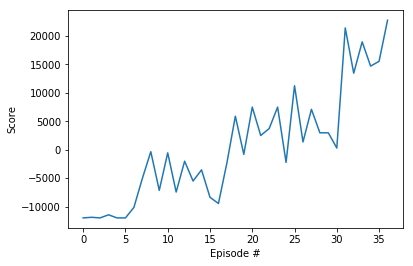

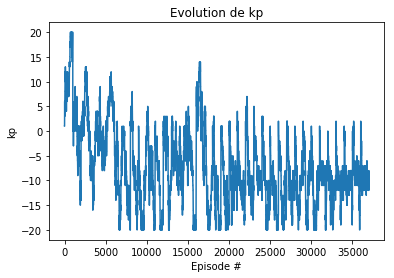

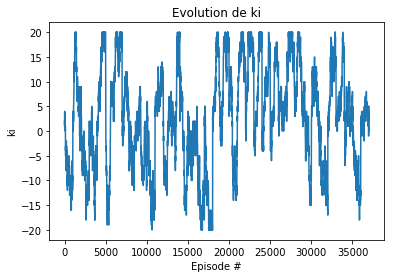

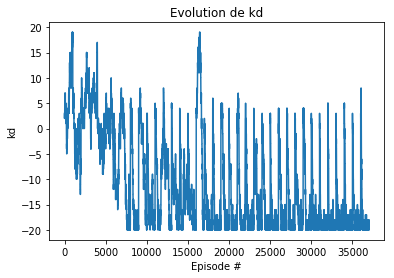

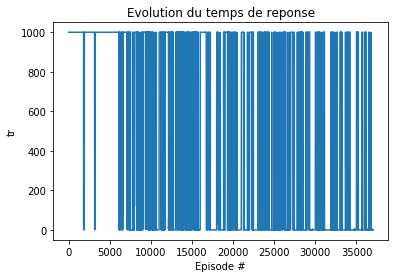

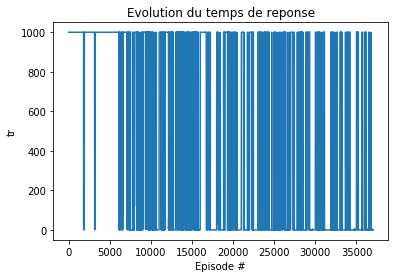

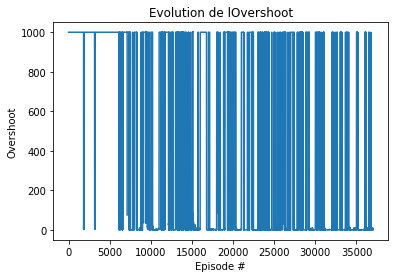

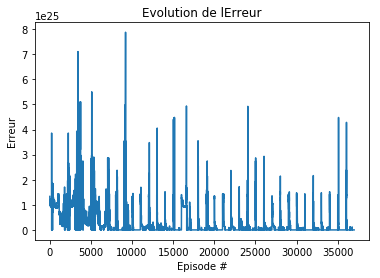

In [18]:
evolution_kp = []
evolution_ki = []
evolution_kd = []

tr_desire=1
ov_desire=1.15
err_desire=0
objectif=np.array([tr_desire,ov_desire,err_desire])

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        # kp ki kd
        # state = env.reset()
        state = np.array([1,2,3])
       
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)  # produit un chiffre entre 0-9
            #next_state, reward, done, _ = env.step(action)
            next_state = faire_action(action,state)  # produit un vecteur kp ki kd
            reward, done = recompense(next_state,objectif) # calcul la recompense avec le cahier de charge
            
            agent.step(state, action, reward, next_state, done)# permet de stocker dans la memoire
            
            state = next_state
            score += reward
            print('\n kp: {}, ki: {}, kd: {} '.format(state[0],state[1],state[2]))
            evolution_kp.append(state[0])
            evolution_ki.append(state[1])
            evolution_kd.append(state[2])
            if done:
                break 
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=500.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint3.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_kp)), evolution_kp)
plt.ylabel('kp')
plt.xlabel('Episode #')
plt.title('Evolution de kp')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_ki)), evolution_ki)
plt.ylabel('ki')
plt.xlabel('Episode #')
plt.title('Evolution de ki')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_kd)), evolution_kd)
plt.ylabel('kd')
plt.xlabel('Episode #')
plt.title('Evolution de kd')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_tr)), evolution_tr)
plt.ylabel('tr')
plt.xlabel('Episode #')
plt.title('Evolution du temps de reponse')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_tr)), evolution_tr)
plt.ylabel('tr')
plt.xlabel('Episode #')
plt.title('Evolution du temps de reponse')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_ov)), evolution_ov)
plt.ylabel('Overshoot')
plt.xlabel('Episode #')
plt.title('Evolution de l''Overshoot')
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(evolution_er)), evolution_er)
plt.ylabel('Erreur')
plt.xlabel('Episode #')
plt.title('Evolution de l''Erreur')
plt.show()
